In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
loan_data= pd.read_csv("loan.csv")
loan_data.head()

/tmp/ipykernel_446916/2123767370.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data= pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Loading the data and data dictionary via pandas's read methods for excel and csv
# loan_data = pd.read_csv('D:\Machine learnning\data visualization\lending club case study\loan\loan.csv')
loan_dd = pd.read_excel('Data_Dictionary.xlsx')

DATA INFORMATION

In [5]:
## Number of rows and columns
print('Number of Columns:',loan_data.shape[1])
print('Number of Rows:',loan_data.shape[0])
## Number of missing values
print('Number of missing values:',loan_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',loan_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',loan_data.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [8]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [9]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

CLEANING THE DATA

In [10]:
def totalnullvalues(data):
    for col in data.columns:
         print(col, data[col].isnull().sum())

In [11]:
totalnullvalues(loan_data)

id 0
member_id 0
loan_amnt 0
funded_amnt 0
funded_amnt_inv 0
term 0
int_rate 0
installment 0
grade 0
sub_grade 0
emp_title 2459
emp_length 1075
home_ownership 0
annual_inc 0
verification_status 0
issue_d 0
loan_status 0
pymnt_plan 0
url 0
desc 12942
purpose 0
title 11
zip_code 0
addr_state 0
dti 0
delinq_2yrs 0
earliest_cr_line 0
inq_last_6mths 0
mths_since_last_delinq 25682
mths_since_last_record 36931
open_acc 0
pub_rec 0
revol_bal 0
revol_util 50
total_acc 0
initial_list_status 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
recoveries 0
collection_recovery_fee 0
last_pymnt_d 71
last_pymnt_amnt 0
next_pymnt_d 38577
last_credit_pull_d 2
collections_12_mths_ex_med 56
mths_since_last_major_derog 39717
policy_code 0
application_type 0
annual_inc_joint 39717
dti_joint 39717
verification_status_joint 39717
acc_now_delinq 0
tot_coll_amt 39717
tot_cur_bal 39717
open_acc_6m 39717
open_il_6m 39717
open_il_12m 39717
open_il_2

In [12]:
for col in loan_data.columns:
         print(col, loan_data[col].isnull().sum()*100/len(loan_data))

id 0.0
member_id 0.0
loan_amnt 0.0
funded_amnt 0.0
funded_amnt_inv 0.0
term 0.0
int_rate 0.0
installment 0.0
grade 0.0
sub_grade 0.0
emp_title 6.191303472064859
emp_length 2.7066495455346575
home_ownership 0.0
annual_inc 0.0
verification_status 0.0
issue_d 0.0
loan_status 0.0
pymnt_plan 0.0
url 0.0
desc 32.58554271470655
purpose 0.0
title 0.027695948838029054
zip_code 0.0
addr_state 0.0
dti 0.0
delinq_2yrs 0.0
earliest_cr_line 0.0
inq_last_6mths 0.0
mths_since_last_delinq 64.66248709620565
mths_since_last_record 92.98537150338646
open_acc 0.0
pub_rec 0.0
revol_bal 0.0
revol_util 0.12589067653649572
total_acc 0.0
initial_list_status 0.0
out_prncp 0.0
out_prncp_inv 0.0
total_pymnt 0.0
total_pymnt_inv 0.0
total_rec_prncp 0.0
total_rec_int 0.0
total_rec_late_fee 0.0
recoveries 0.0
collection_recovery_fee 0.0
last_pymnt_d 0.1787647606818239
last_pymnt_amnt 0.0
next_pymnt_d 97.1296925749679
last_credit_pull_d 0.0050356270614598285
collections_12_mths_ex_med 0.1409975577208752
mths_since_last

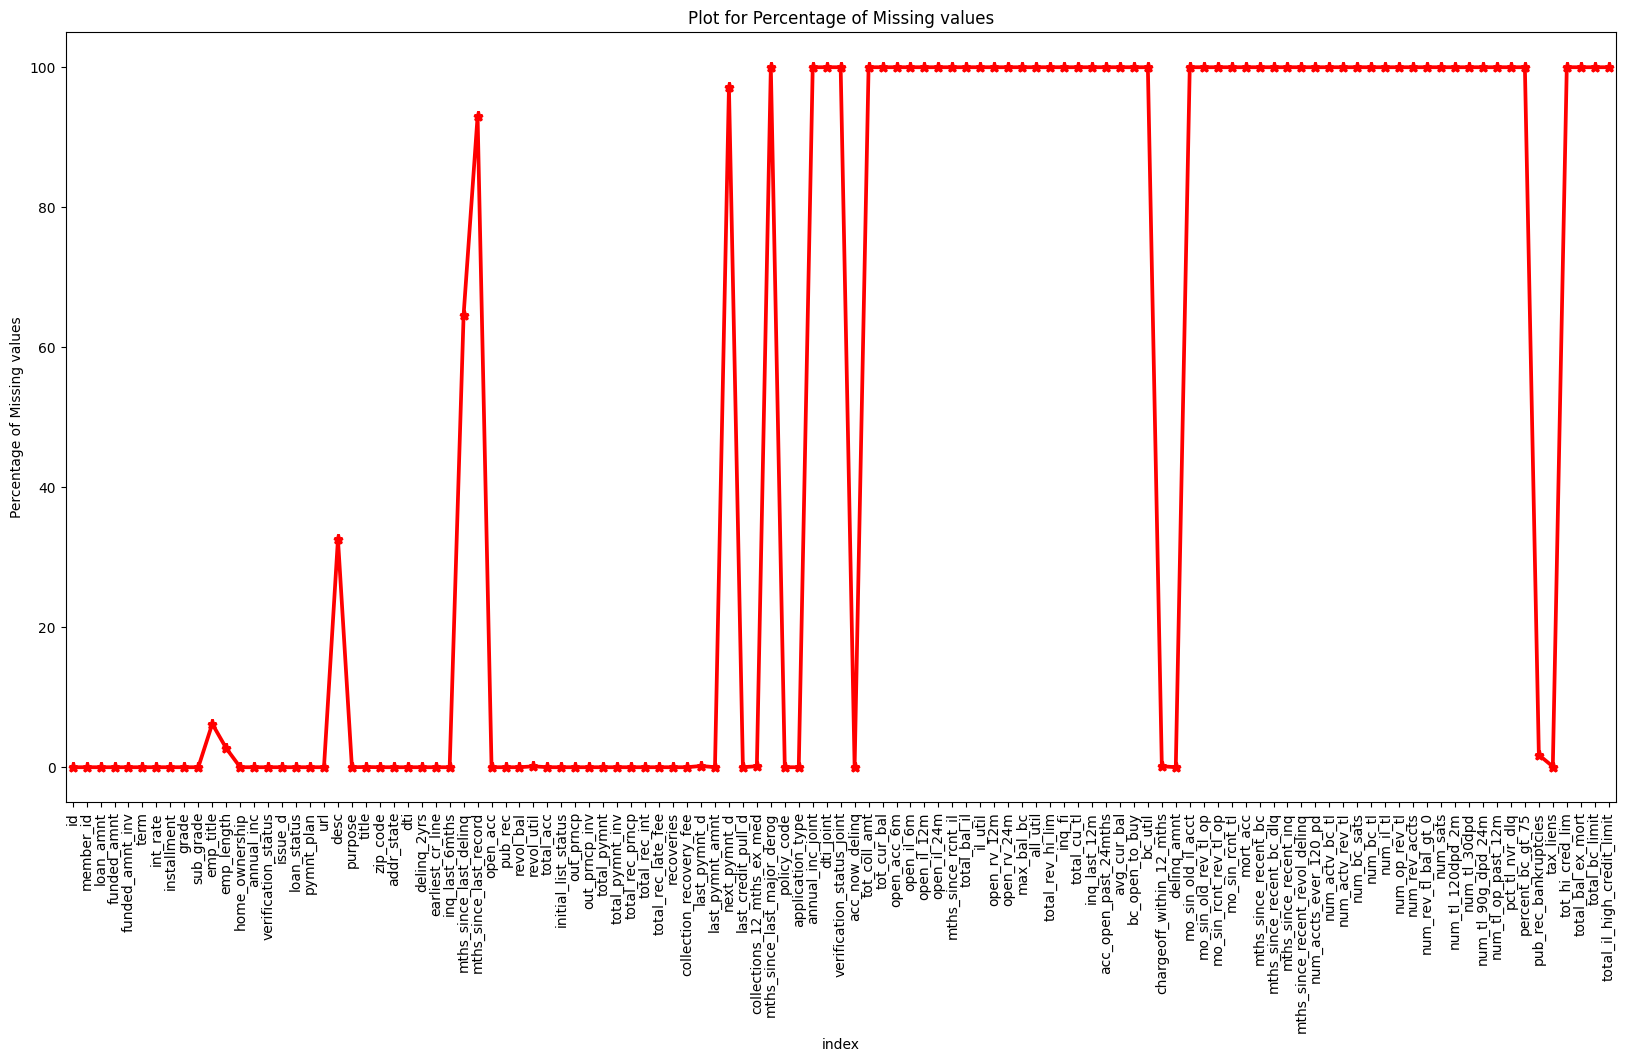

In [13]:
# plotting Percentage of Missing values in each column
miss_data = pd.DataFrame( (loan_data.isnull().sum()) * 100 / loan_data.shape[0]).reset_index()

plt.figure(figsize = (20,10),facecolor='white')

ax = sns.pointplot(data = miss_data,x='index',y= 0, color='Red',markers='*')

plt.xticks(rotation = 90, fontsize = 10)

plt.title("Plot for Percentage of Missing values")

plt.ylabel("Percentage of Missing values")

plt.show()

Handling the missing values 

In [14]:
# Checking for missing values across the rows
print((loan_data.isnull().sum(axis=1)).max())

62


 Drop all columns that have all the values as null


In [15]:
print(loan_data.shape)
#Remove missing value columns if any
loan_data.dropna(axis = 1, how = 'all', inplace = True)
print(loan_data.shape)

(39717, 111)
(39717, 57)


In [16]:
loan_data.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Check how many unique values does each column have



In [17]:
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [17]:
# loan_data.isnull().sum()*100/len(loan_data)

# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis


In [18]:
loan_data=loan_data.drop(columns=['mths_since_last_delinq', 'mths_since_last_record','next_pymnt_d'],axis=1)

In [19]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
loan_data.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [21]:
loan_data.desc.value_counts()

desc
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           210
Debt Consolidation                                                                                                                                                                  

In [22]:
loan_data.desc.mode()

0     
Name: desc, dtype: object

In [23]:
loan_data['desc']=loan_data.desc.fillna(loan_data.desc.mode())

In [24]:
loan_data.dropna(axis=0,inplace=True)

In [25]:
loan_data.loan_status.value_counts()

loan_status
Fully Paid     20397
Charged Off     3328
Current          679
Name: count, dtype: int64

In [26]:
loan_data['target']=loan_data.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)

#### Key Takeaway: 
## Here 0 represent the not defaulted  and 1 represent the defaulted.

In [144]:
loan_data['int_rate']=loan_data.int_rate.apply(lambda x: float(x[:-1]))

In [145]:
loan_data['int_rate'].head()

1    15.27
3    13.49
4    12.69
6    15.96
7    18.64
Name: int_rate, dtype: float64

In [146]:
loan_data['term']=loan_data.term.apply(lambda x: int(x[:3]))
loan_data['term'].head()

1    60
3    36
4    60
6    60
7    36
Name: term, dtype: int64

In [147]:
# loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x: float(x[:-1]))

loan_data['revol_util'].head()

1     9.40%
3       21%
4    53.90%
6    85.60%
7    87.50%
Name: revol_util, dtype: object

DATA ANALYSIS

In [148]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,target
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,E,E1,...,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0


In [149]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24404 entries, 1 to 39623
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          24404 non-null  int64  
 1   member_id                   24404 non-null  int64  
 2   loan_amnt                   24404 non-null  int64  
 3   funded_amnt                 24404 non-null  int64  
 4   funded_amnt_inv             24404 non-null  float64
 5   term                        24404 non-null  int64  
 6   int_rate                    24404 non-null  float64
 7   installment                 24404 non-null  float64
 8   grade                       24404 non-null  object 
 9   sub_grade                   24404 non-null  object 
 10  emp_title                   24404 non-null  object 
 11  emp_length                  24404 non-null  object 
 12  home_ownership              24404 non-null  object 
 13  annual_inc                  24404 no

In [150]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,target
count,2.440400e+04,2.440400e+04,24404.000000,24404.000000,24404.000000,24404.000000,24404.000000,24404.000000,2.440400e+04,24404.000000,...,24404.000000,24404.000000,24404.0,24404.0,24404.0,24404.0,24404.0,24404.000000,24404.0,24404.000000
mean,6.581668e+05,8.170119e+05,11630.774668,11324.460129,10759.266274,42.453368,12.090716,336.236721,6.934068e+04,13.471279,...,12.975127,2775.391002,0.0,1.0,0.0,0.0,0.0,0.041264,0.0,0.136371
std,2.070934e+05,2.647096e+05,7355.480685,7081.442931,7023.252396,10.641406,3.651300,206.049525,5.761037e+04,6.631951,...,150.850194,4466.513335,0.0,0.0,0.0,0.0,0.0,0.199726,0.0,0.343189
min,5.574200e+04,1.144260e+05,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,4.000000e+03,0.000000,...,0.000000,0.010000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000
25%,4.824580e+05,6.129310e+05,6000.000000,6000.000000,5400.000000,36.000000,9.620000,180.960000,4.200000e+04,8.407500,...,0.000000,235.195000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000
50%,6.288850e+05,8.051305e+05,10000.000000,10000.000000,9570.707127,36.000000,11.890000,298.895000,6.000000e+04,13.610000,...,0.000000,587.490000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000
75%,8.156080e+05,1.022824e+06,15000.000000,15000.000000,14750.000000,60.000000,14.460000,448.555000,8.300000e+04,18.720000,...,0.000000,3547.245000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1288.100000,3.900000e+06,29.990000,...,6543.040000,35479.890000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,1.000000


In [151]:
#List of numerical values
numerical_features=[feature for feature in loan_data.columns if loan_data[feature].dtypes!='O']
print('number of numerical_features:',len(numerical_features))
print("the numerical features:",numerical_features)

number of numerical_features: 34
the numerical features: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'target']


In [152]:
discrete_feature=[feature for feature in numerical_features if len(loan_data[feature].unique())<25]
print("number of discrete Variables Count: ",len(discrete_feature))
print("the discrete features:",discrete_feature)

number of discrete Variables Count:  12
the discrete features: ['term', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'target']


### UNIVARIATE ANALYSIS

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])
/tmp/ipykernel_205564/3101865104.py:8: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


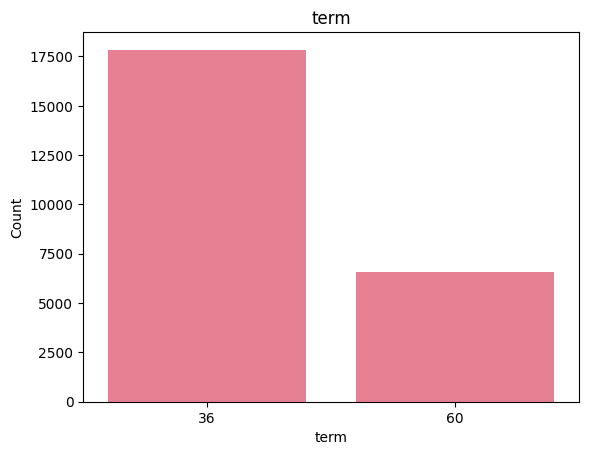

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])
/tmp/ipykernel_205564/3101865104.py:8: UserWarning: 
The palette list has fewer values (1) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


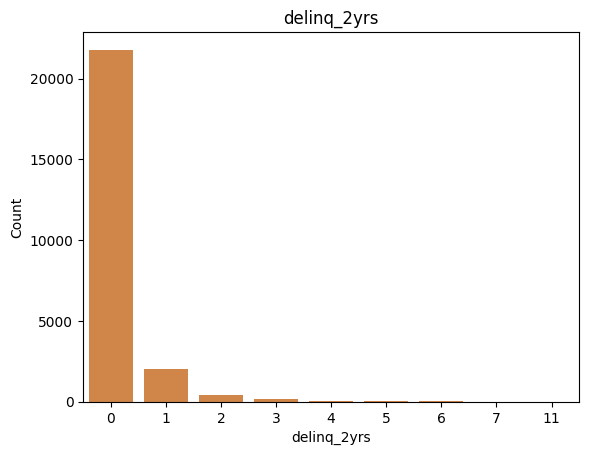

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])
/tmp/ipykernel_205564/3101865104.py:8: UserWarning: 
The palette list has fewer values (1) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


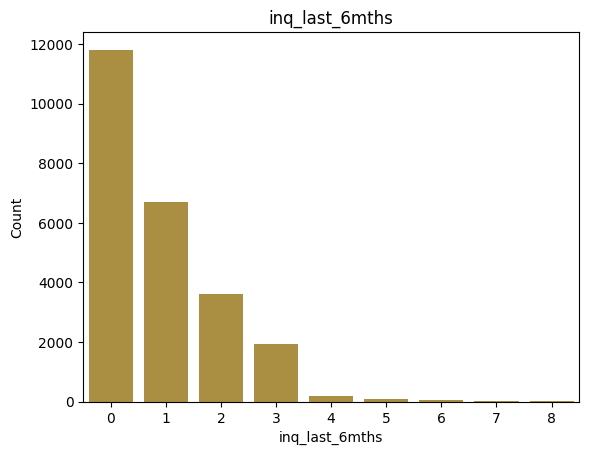

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])
/tmp/ipykernel_205564/3101865104.py:8: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


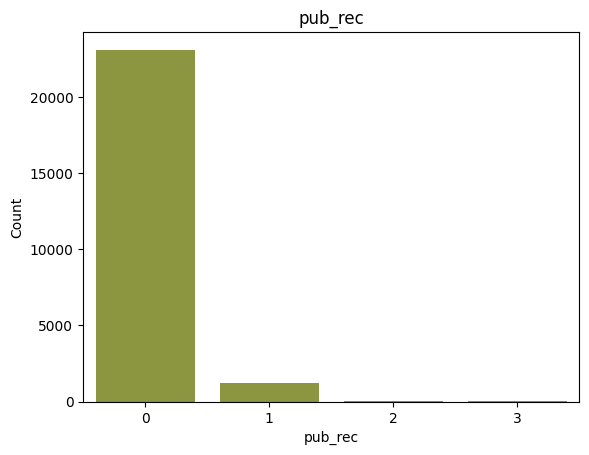

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


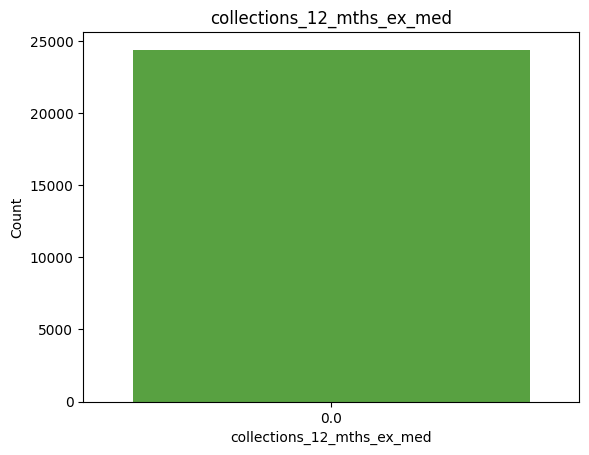

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


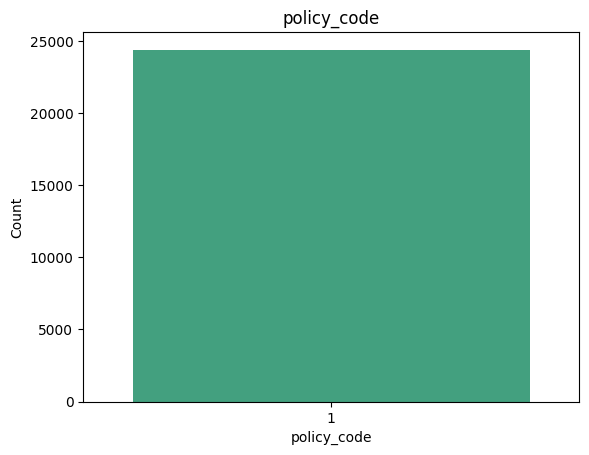

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


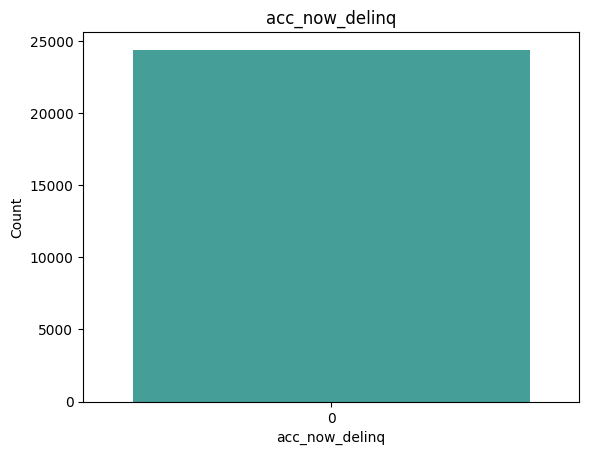

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


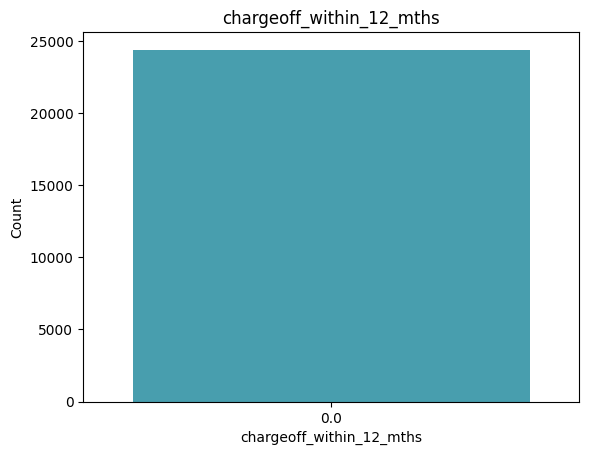

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


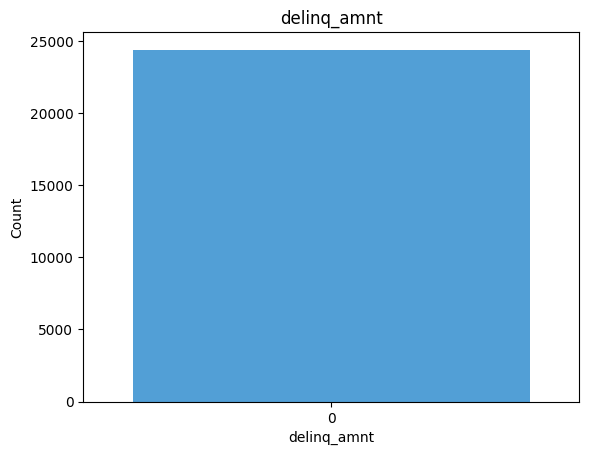

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])
/tmp/ipykernel_205564/3101865104.py:8: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


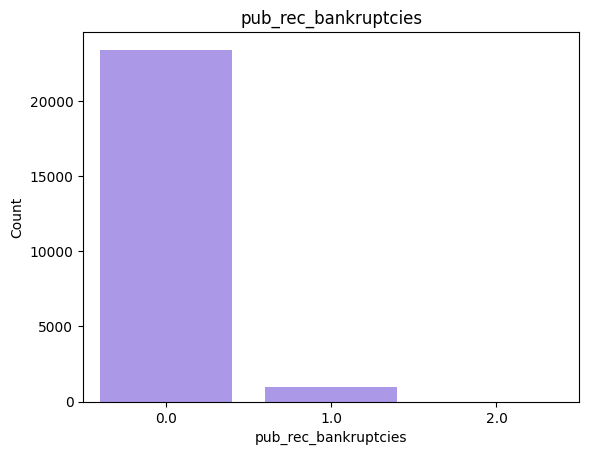

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


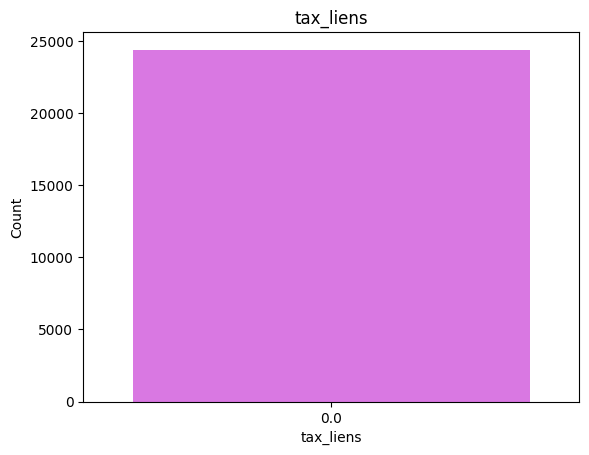

/tmp/ipykernel_205564/3101865104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])
/tmp/ipykernel_205564/3101865104.py:8: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])


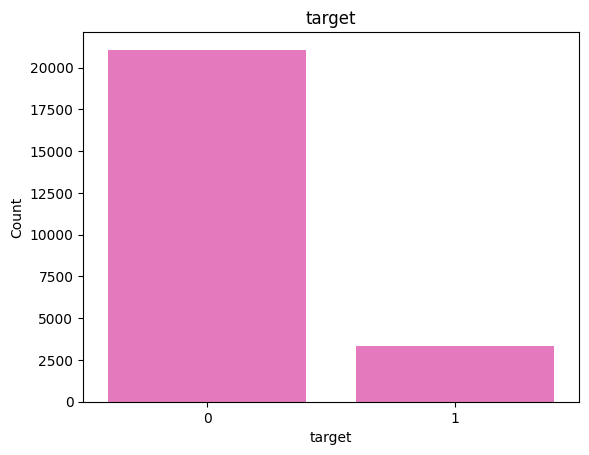

In [50]:
output_dir = 'plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
palette = sns.color_palette("husl", len(discrete_feature))

for i, feature in enumerate(discrete_feature):
    plt.figure()
    sns.countplot(data=loan_data, x=loan_data[feature], palette=[palette[i]])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    
    file_path = os.path.join(output_dir, f'{feature}.png')
    plt.savefig(file_path)
    
    plt.show()
    
    plt.close()


# Insights

## We can observe the above graphs shows the count plots of all the discrete feature. 
1. it suggests that loans or instances with a term of “36” are more common than those with a term of “60”
2. From the graph we can suggest that most instances have no delinquencies in the past two years
3. Almost all instances did not have charge-offs within 12 months
4. Most borrowers have no public record bankruptcies, indicating financial stability.

Continuous features

In [52]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count: ",len(continuous_feature))
print("the Continuous features:",continuous_feature)

Continuous feature Count:  23
the Continuous features: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']


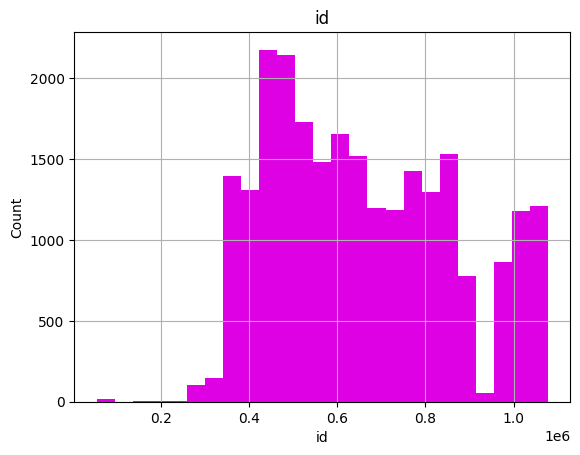

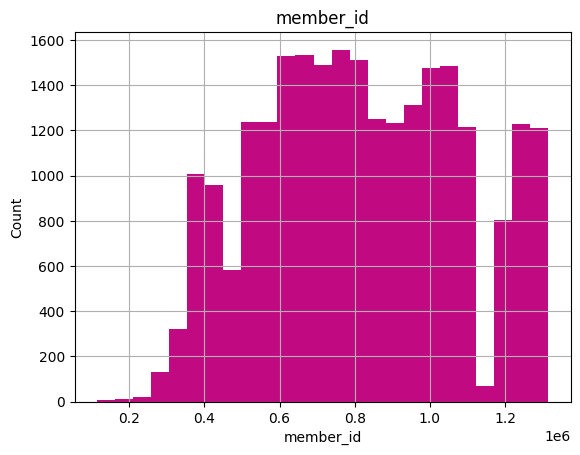

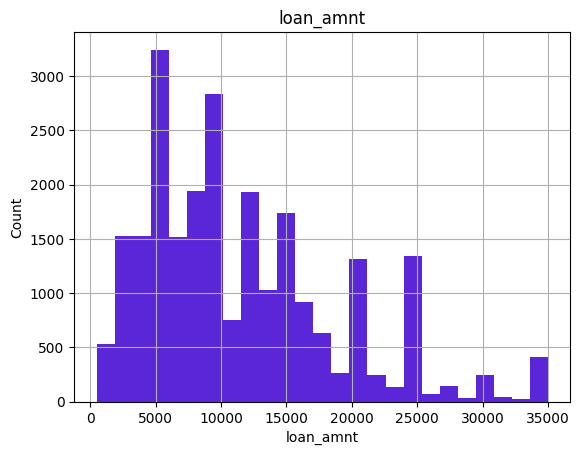

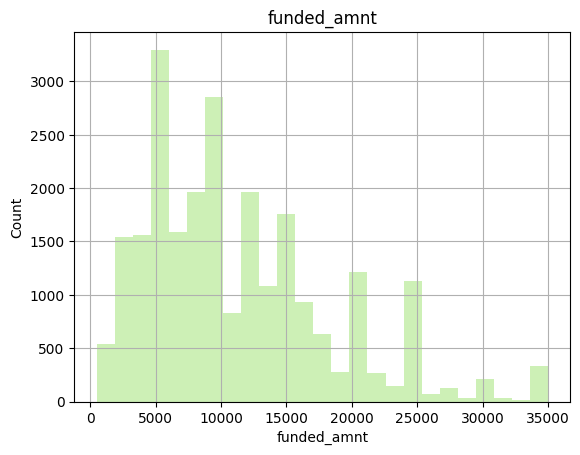

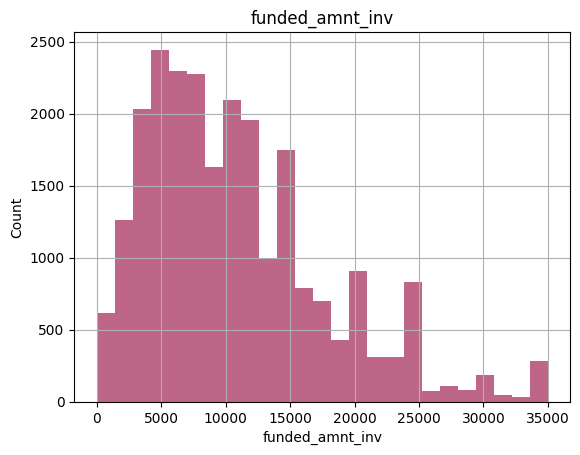

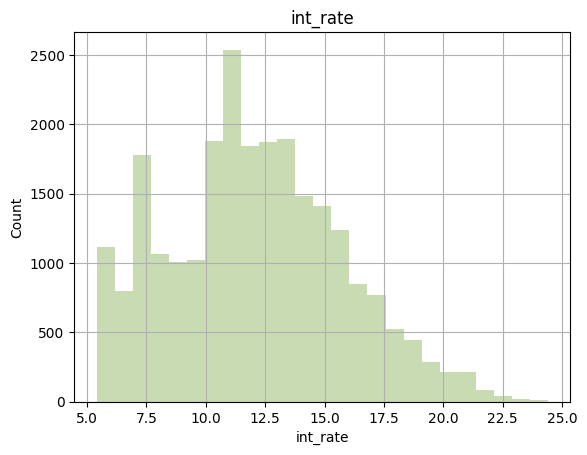

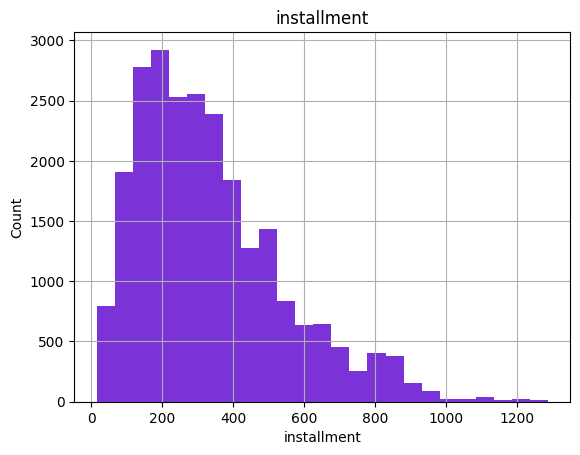

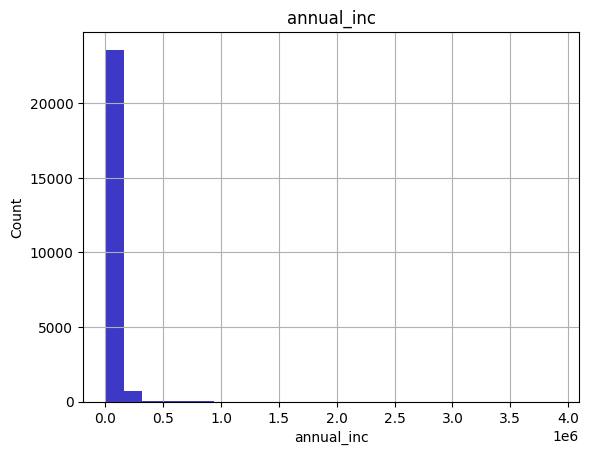

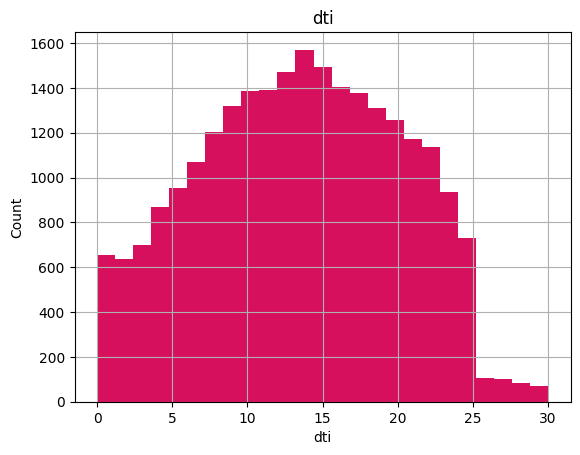

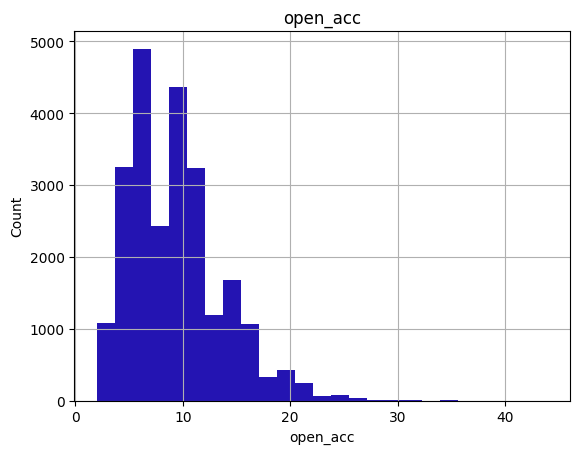

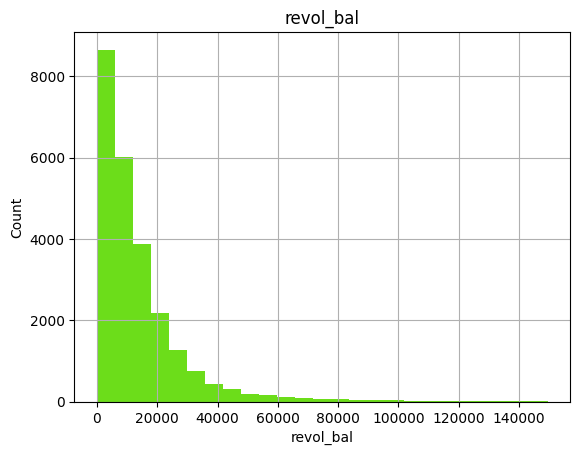

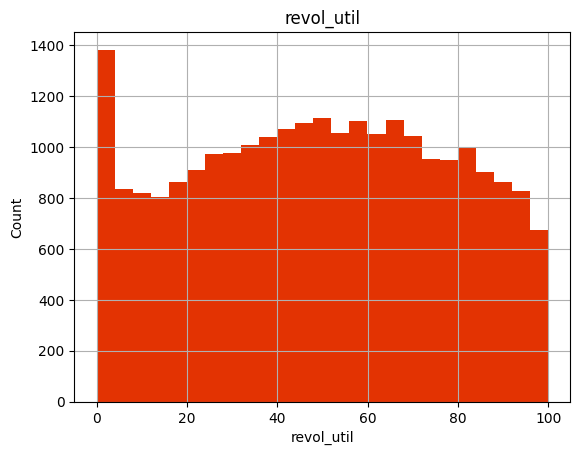

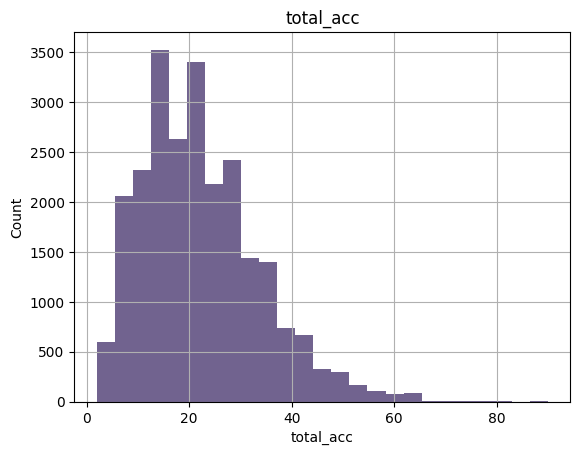

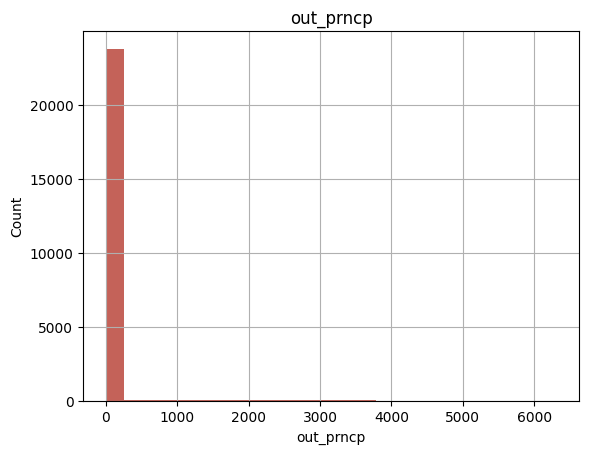

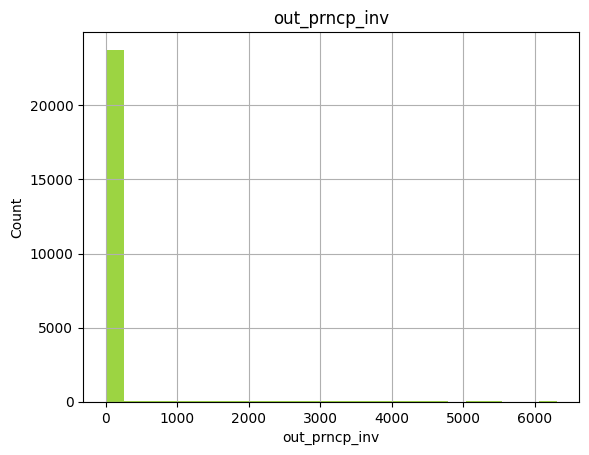

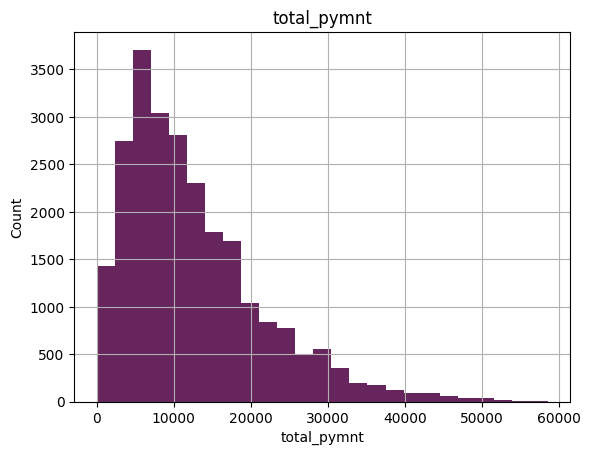

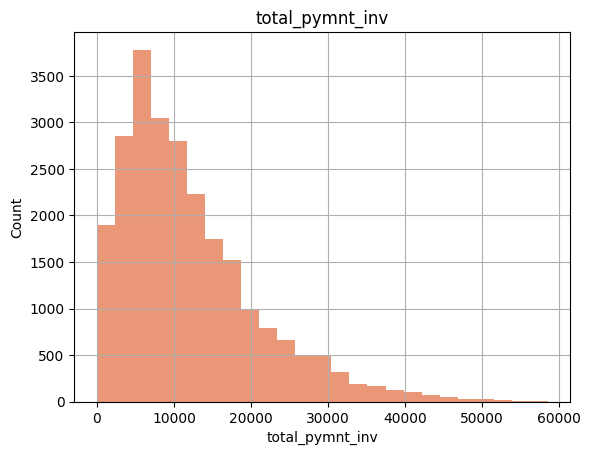

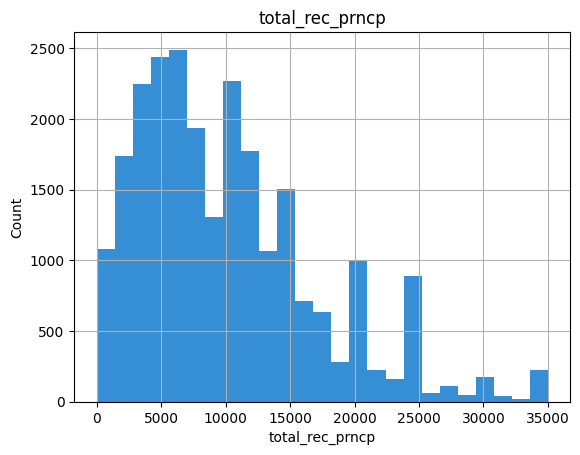

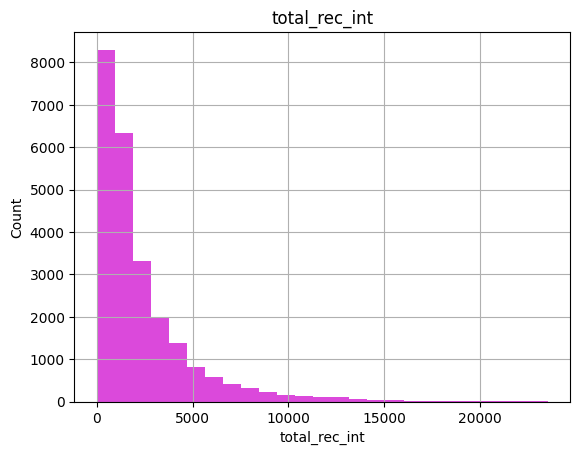

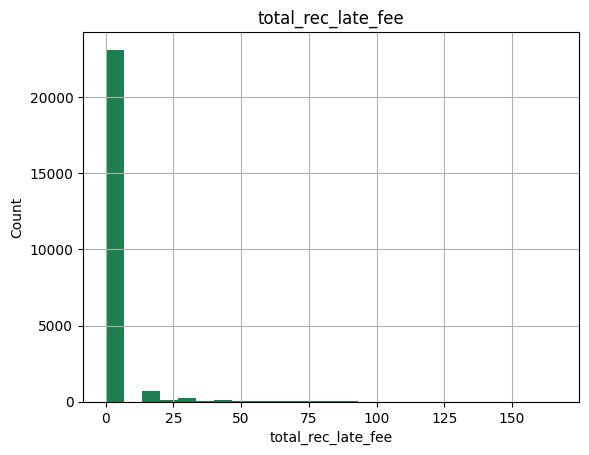

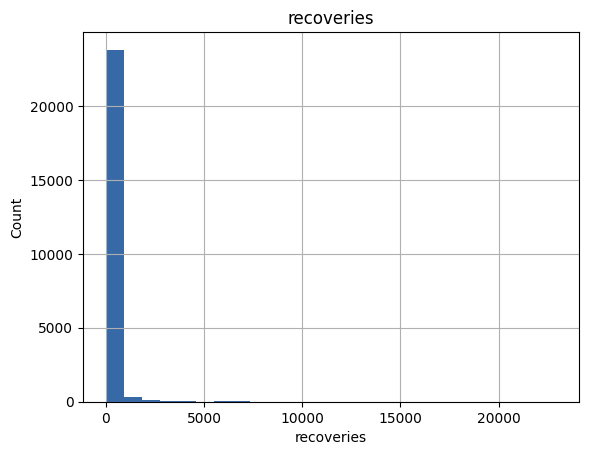

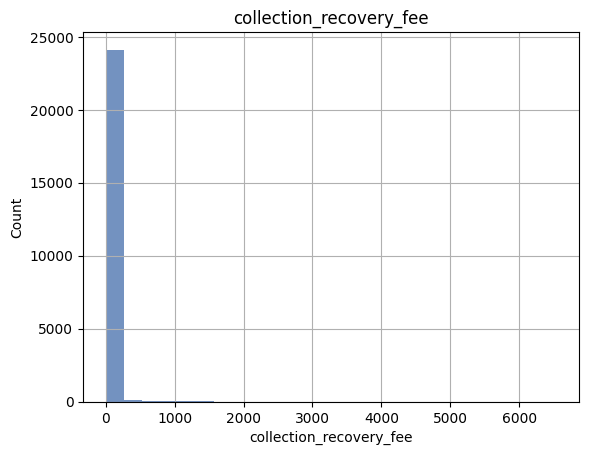

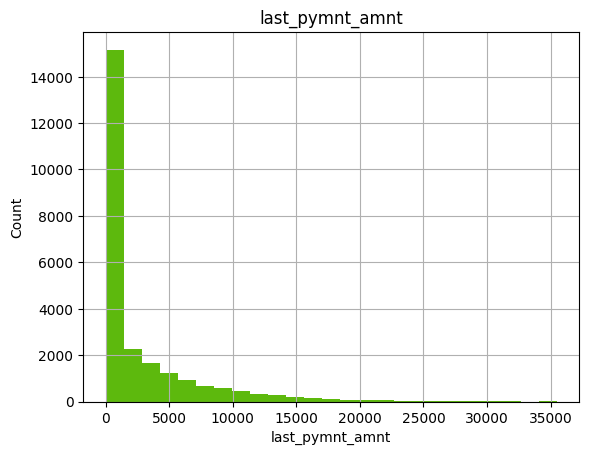

In [53]:
#now we will plot the graphs of continuous features 

import os
import numpy as np
import matplotlib.pyplot as plt

output_dir = 'plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

data=loan_data.copy()
for feature in continuous_feature:
    plt.figure()  
    color = np.random.rand(3,) 
    
    data[feature].hist(bins=25, color=color)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    
    file_path = os.path.join(output_dir, f'{feature}_hist.png')
    plt.savefig(file_path)
    
    plt.show()
    
    plt.close()  


## Insights

1. loan_amnt : There are peaks at certain intervals, indicating that some loan amounts are more frequently taken out by borrowers.
                The loan amounts range from 0 to 35,000, with varying frequencies
2. Understanding which amounts are most frequently funded can help in making decisions about loan offerings, interest rates, and risk management.
3. Common Installment Amounts: The majority of the bars are concentrated in the lower range of installment values, indicating that lower installment amounts are more common.
4. The total received late fees range from 0 to 150, with the majority of counts concentrated at the lower end.
5. Common Payment Amounts: The highest bar at the beginning indicates that a large number of last payments are small amounts, close to zero.
The last payment amounts range from 0 to 35,000, with the majority of payments concentrated at the lower end.

we will draw the graphs for categorical features

In [54]:
##list of categorical features
categorical_features=[feature for feature in loan_data.columns if data[feature].dtypes=='O']
categorical_features

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [55]:
categorical_features= [features for features in categorical_features if features not in ('emp_title', "url",'desc',"title")]

/tmp/ipykernel_205564/3047136451.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], ax=axes[i], palette=colors)
/tmp/ipykernel_205564/3047136451.py:21: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(data=loan_data, x=loan_data[feature], ax=axes[i], palette=colors)
/tmp/ipykernel_205564/3047136451.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x=loan_data[feature], ax=axes[i], palette=colors)
/tmp/ipykernel_205564/3047136451.py:21: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palett

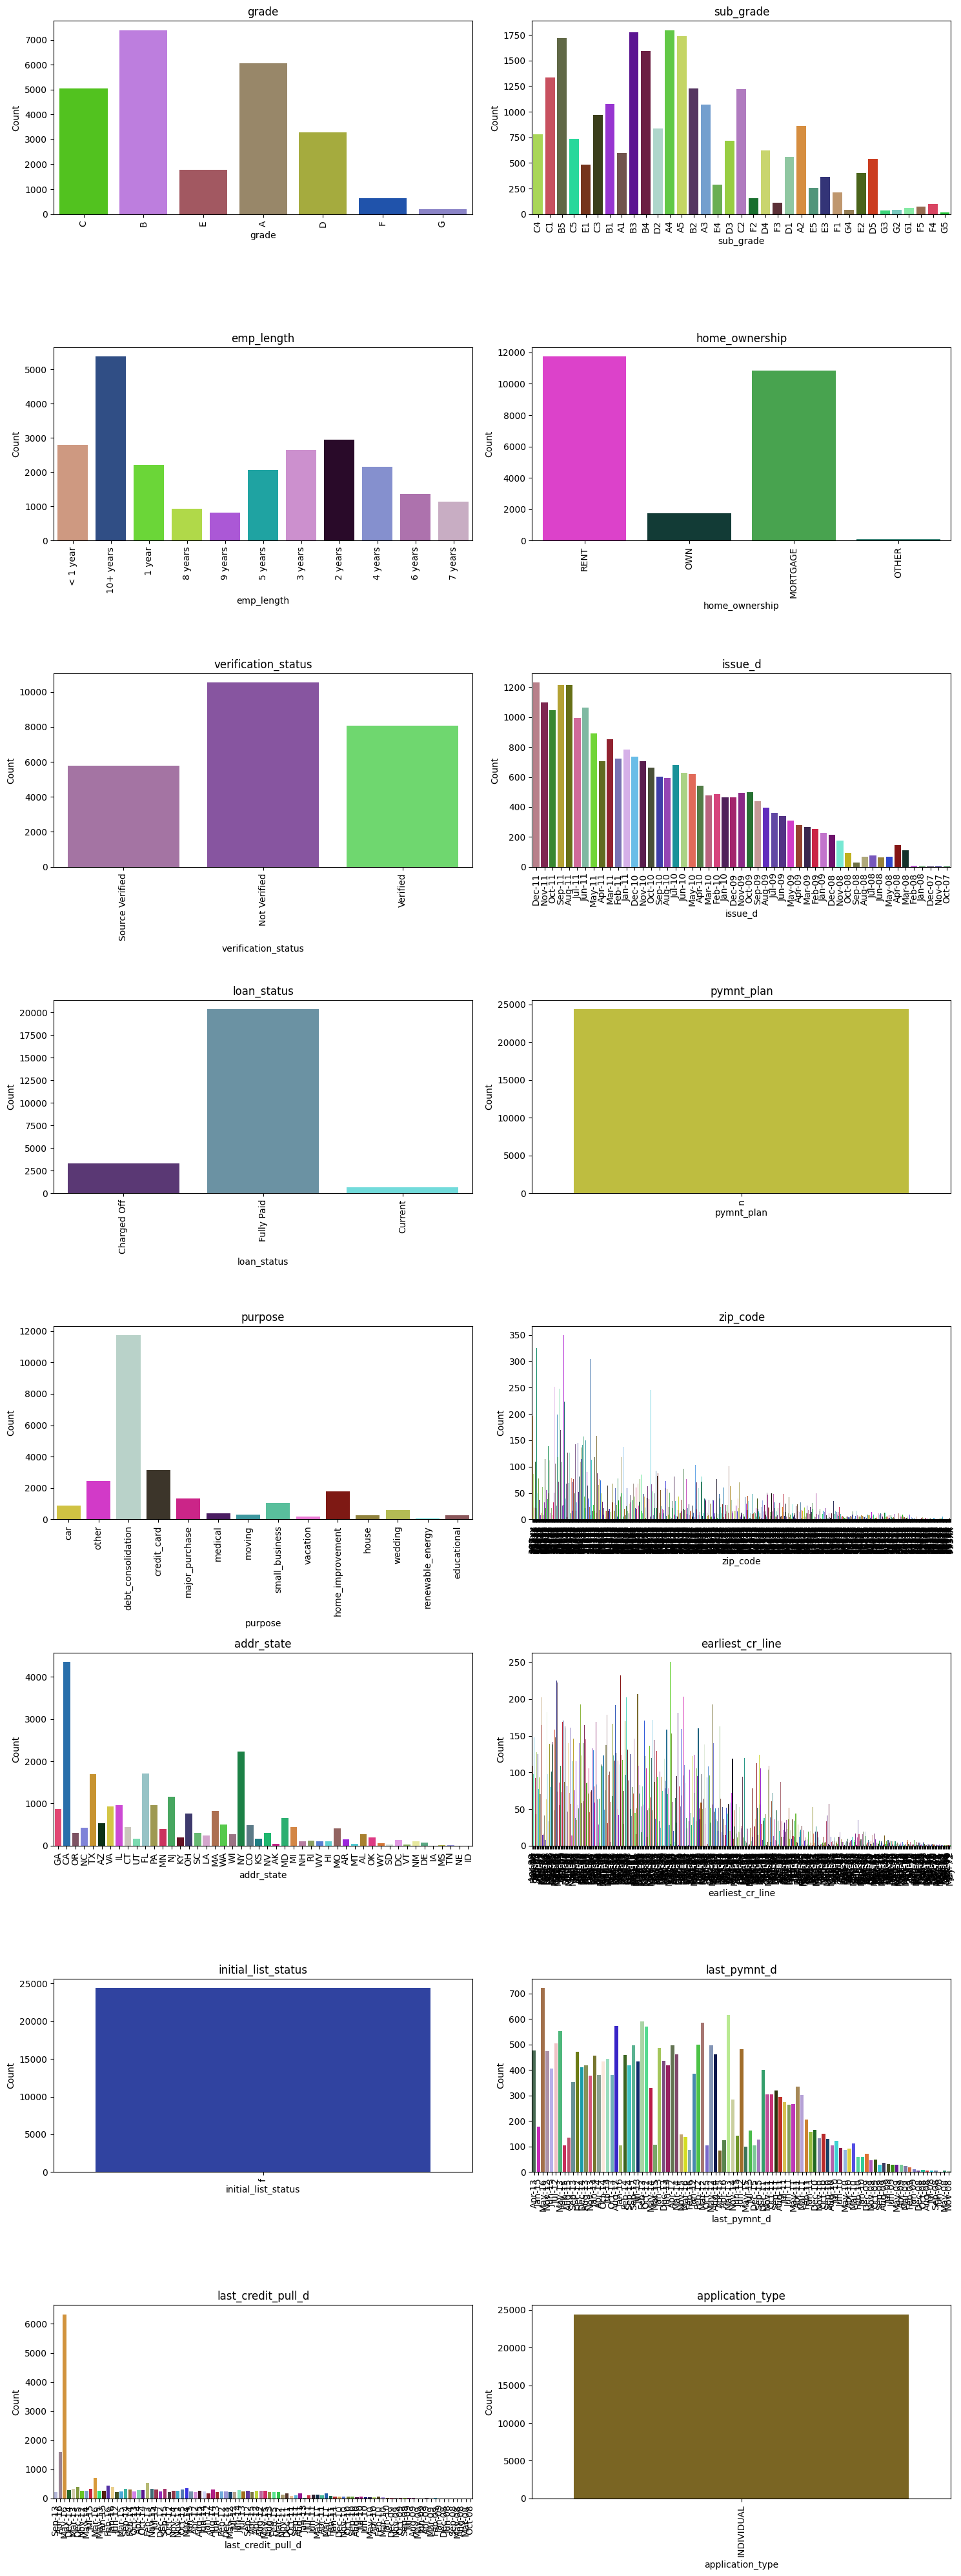

In [60]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

output_dir = 'plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

num_features = len(categorical_features)
n_cols = 2 
n_rows = (num_features // n_cols) + (num_features % n_cols > 0)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5)) 
axes = axes.flatten()  

for i, feature in enumerate(categorical_features):
    # Generate random colors
    colors = np.random.rand(len(loan_data[feature].unique()), 3)
    
    sns.countplot(data=loan_data, x=loan_data[feature], ax=axes[i], palette=colors)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_title(feature)
    
    # Adjust rotation and font size for better readability
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)

plt.tight_layout()

file_path = os.path.join(output_dir, 'categorical_features_countplot_1.png')
plt.savefig(file_path)

plt.show()
plt.close()


Let's take a look at some graphs that will help us understand better

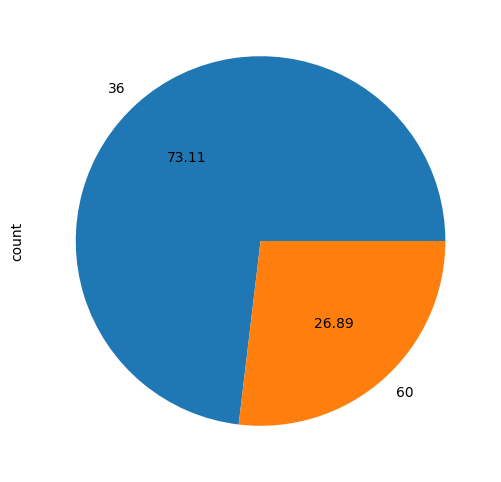

In [59]:
plt.figure(figsize=[6,6])
loan_data['term'].value_counts().plot(kind='pie', autopct='%.2f', fontsize=10)
plt.show()

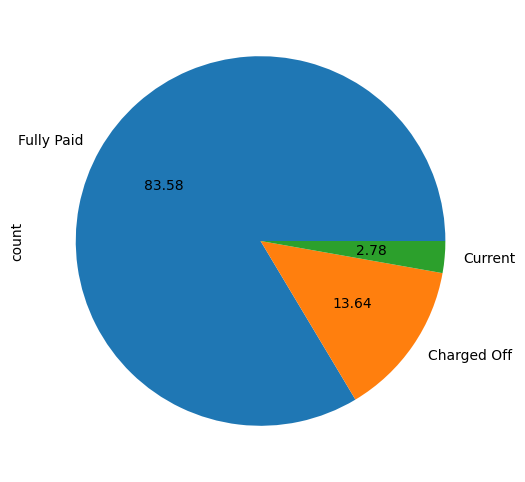

In [61]:
plt.figure(figsize=[6,6])
loan_data['loan_status'].value_counts().plot(kind='pie', autopct='%.2f', fontsize=10)
plt.show()

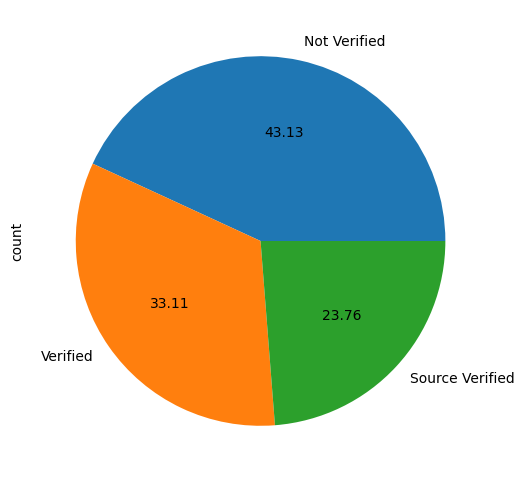

In [62]:
plt.figure(figsize=[6,6])
loan_data['verification_status'].value_counts().plot(kind='pie', autopct='%.2f', fontsize=10)
plt.show()

- The loan provides 36 months and 60 months tenure, of which ~75.5% customers opt of 36 months

- The customer documents can either be Verified, Source Verified (verified by 3rd party), or not verified. In the data, 44% customers have thier documents as not verified while the others have it verified at source (25%) or verified (30%)

- A total of 14.7% customer are defaulted and have not paid their loan.

            Bivariate Analysis

Grade vs interest rate 

In [70]:

import warnings

warnings.filterwarnings("ignore")

In [66]:
sns.set_palette(palette)


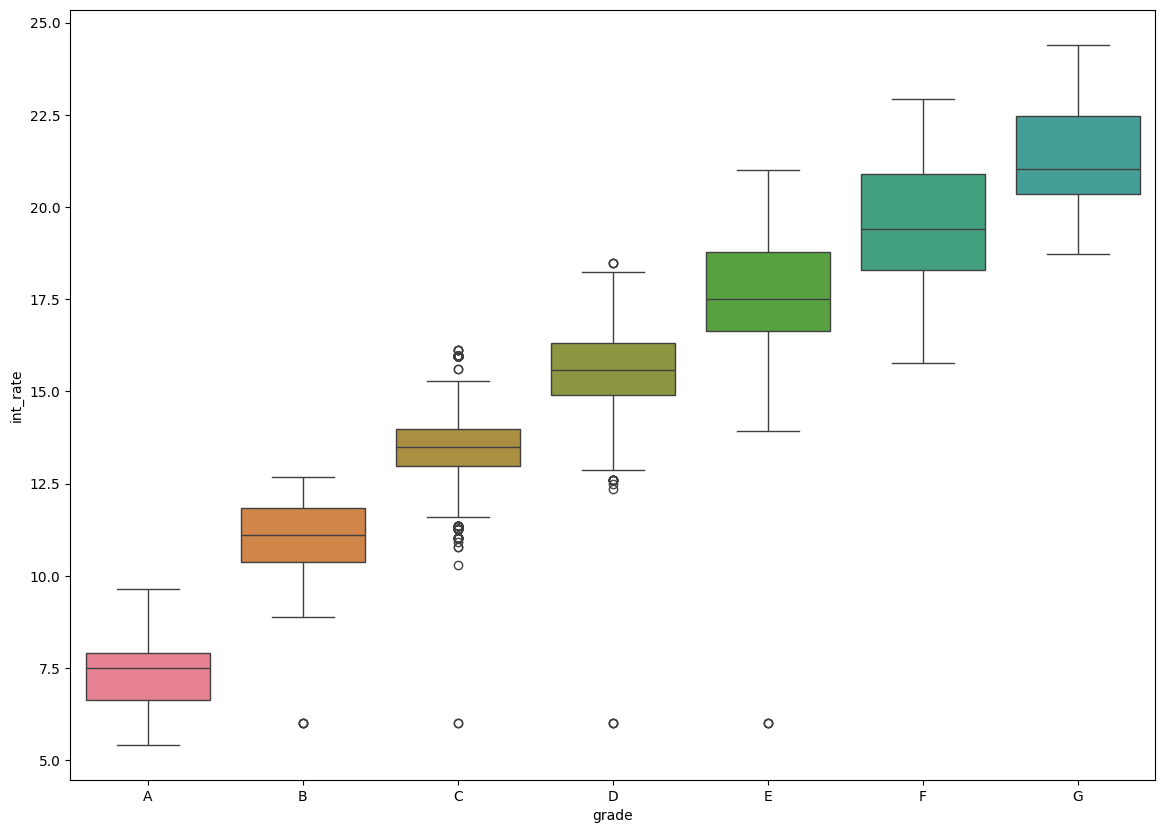

In [71]:
plt.figure(figsize=[14,10])
sns.boxplot(data=loan_data, x='grade', y='int_rate', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette=palette)
plt.show()

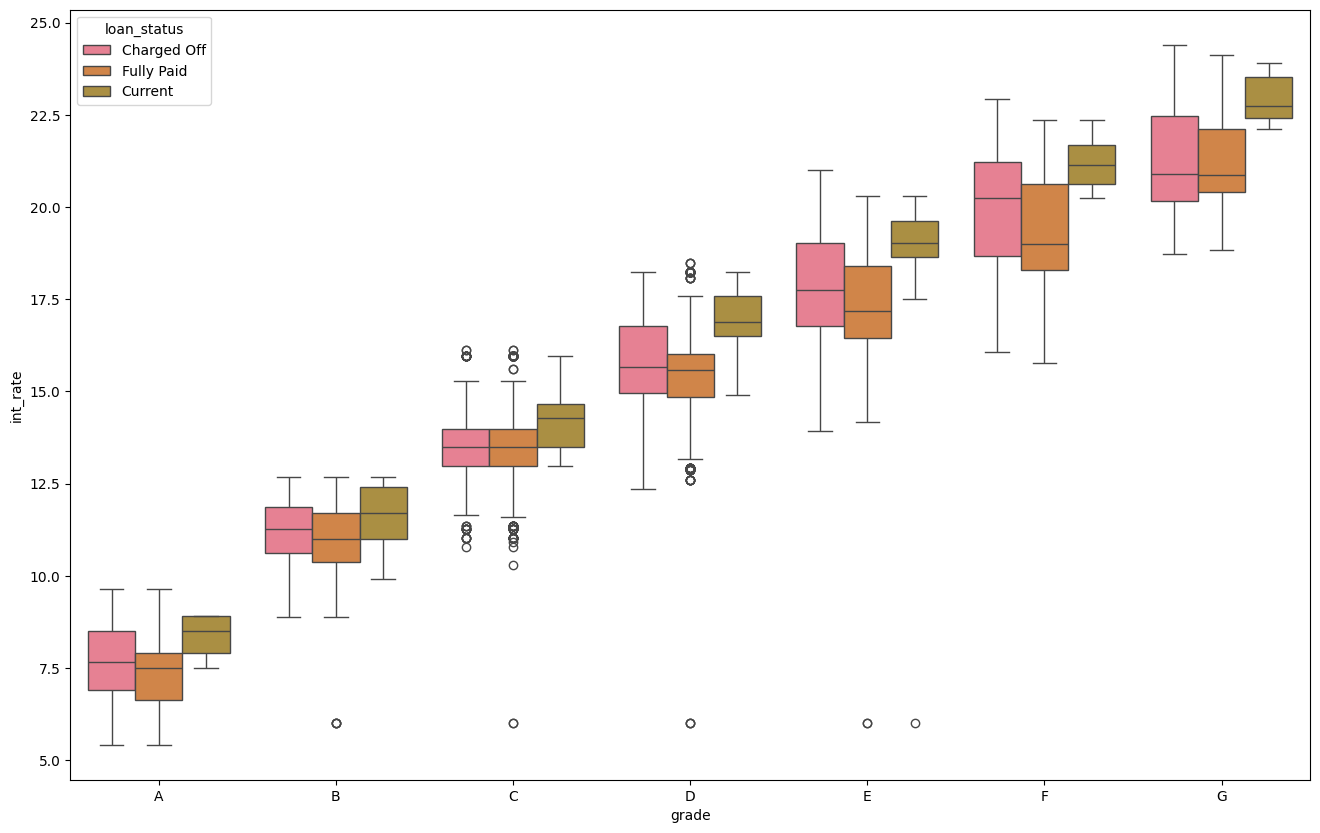

In [73]:
plt.figure(figsize=[16,10])
sns.boxplot(data=loan_data, x='grade', y='int_rate', hue='loan_status', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette=palette)
plt.show()

- The interest rates that the defaulters received was usually higher than the fully paid.
- For Grade A, B,and C, even though the interest rates provided were higher, they had almost a similar median.
- For Grades D-G, Q1, Q3 and median are all higher for defaulters than the fully paid.

LOAN STATUS VS GRADE 

In [74]:
loan_data_temp = 100*loan_data.groupby('loan_status')['grade'].value_counts(normalize=True).unstack()
loan_data_temp

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,9.855769,25.240385,23.768029,20.192308,13.341346,5.829327,1.772837
Current,3.240059,30.486009,23.122239,20.029455,15.611193,5.891016,1.620029
Fully Paid,28.033534,31.087905,20.056871,12.109624,6.069520,2.044418,0.598127


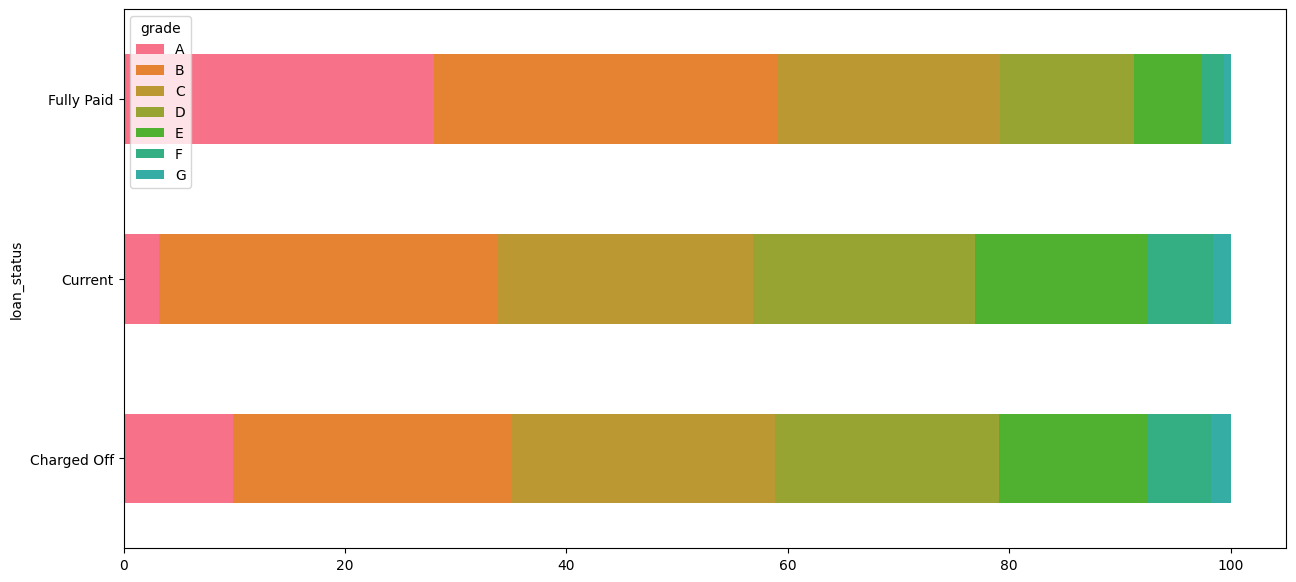

In [75]:
loan_data_temp.plot.barh(width=0.5, stacked=True)
plt.gcf().set_size_inches(15, 7)
plt.show()

In [76]:
loan_data_temp_T = loan_data_temp.div(loan_data_temp.sum(axis=0), axis=1)*100
loan_data_temp_T

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,23.962854,29.073995,35.502681,38.585463,38.094123,42.349640,44.420936
Current,7.877727,35.116345,34.538054,38.274268,44.575314,42.797808,40.592138
Fully Paid,68.159419,35.809660,29.959266,23.140270,17.330563,14.852552,14.986926


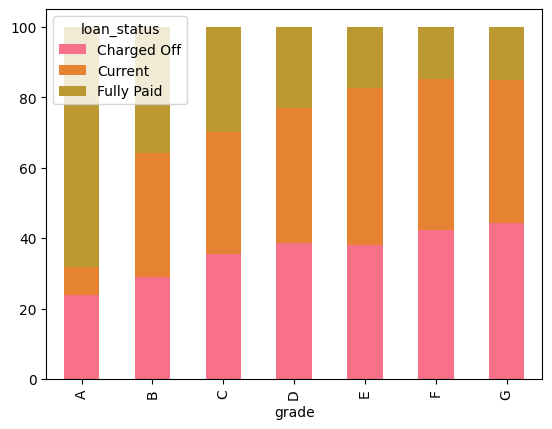

In [77]:
loan_data_temp_T.T.plot.bar(width=0.5, stacked=True)
plt.show()

As we move down from Grade A to G, the contribtuion of defaulters wihtin each grade contines to increase.

- We can conclude that lower the grade, higher the default rate
- Most of the defaulters are from grade B to E

In [78]:
loan_data_temp = 100*loan_data.groupby('loan_status')['sub_grade'].value_counts(normalize=True).unstack()
loan_data_temp = loan_data_temp.T
loan_data_temp['delta'] = loan_data_temp['Charged Off'] - loan_data_temp['Fully Paid']
loan_data_temp

loan_status,Charged Off,Current,Fully Paid,delta
sub_grade,,,,
A1,0.480769,NaN,2.848458,-2.367689
A2,1.292067,NaN,4.020199,-2.728132
A3,1.502404,NaN,5.010541,-3.508137
A4,2.854567,1.178203,8.305143,-5.450576
A5,3.725962,2.061856,7.849194,-4.123232
B1,2.764423,2.209131,4.760504,-1.996081
B2,3.725962,4.712813,5.245869,-1.519908
B3,6.069712,7.805596,7.442271,-1.372559
B4,5.949519,7.658321,6.594107,-0.644588


<Figure size 1600x600 with 0 Axes>

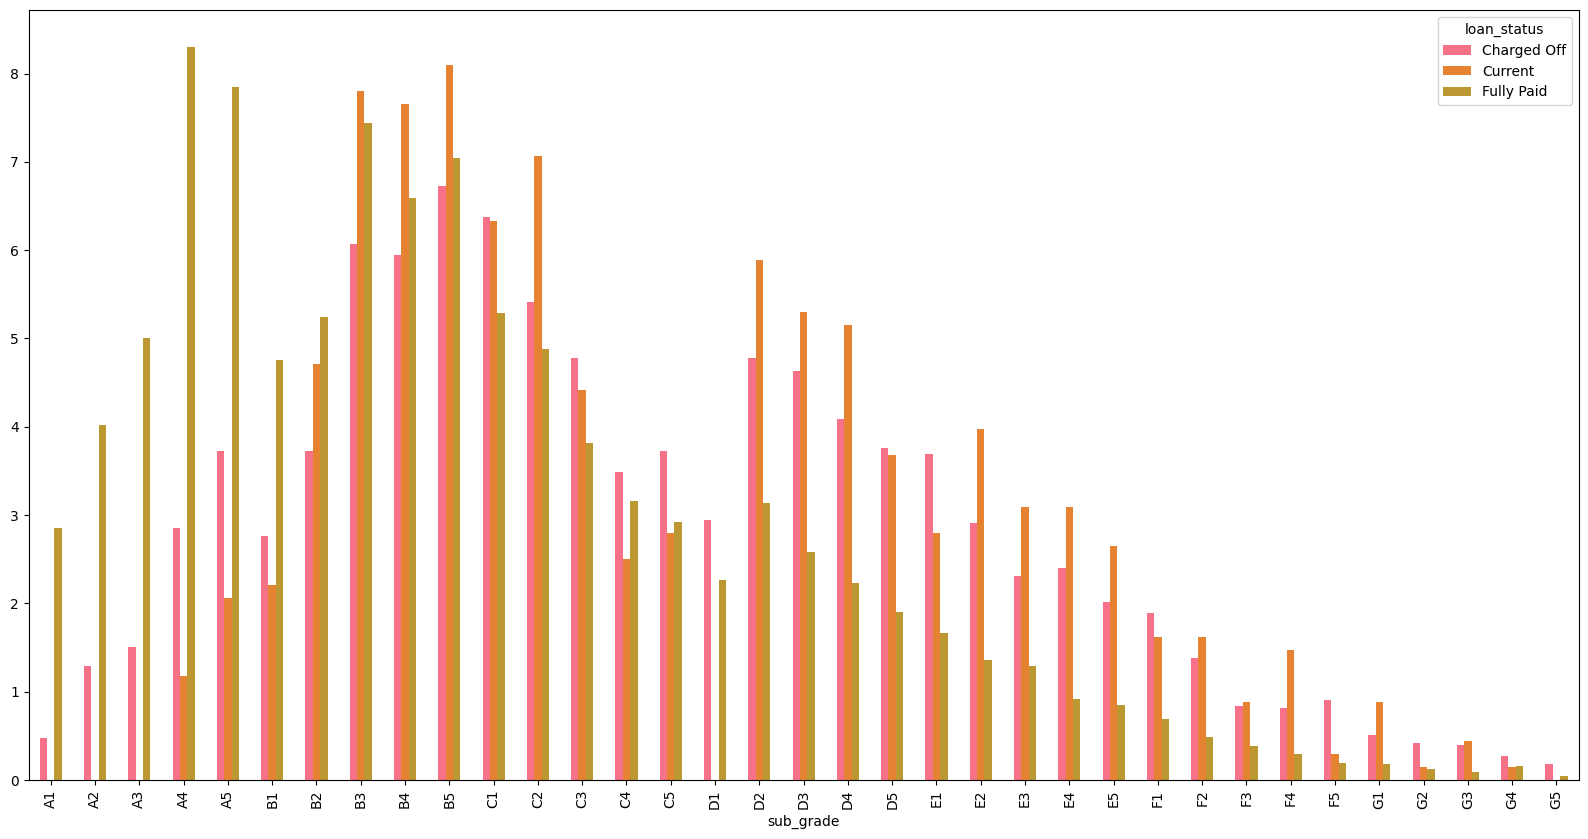

In [82]:
loan_data_temp = 100*loan_data.groupby('loan_status')['sub_grade'].value_counts(normalize=True).unstack()
loan_data_temp = loan_data_temp.T

plt.figure(figsize=[16,6])
loan_data_temp.plot(kind='bar')
plt.gcf().set_size_inches(20, 10)
plt.show()

In [80]:
loan_data_temp = 100*loan_data.groupby('sub_grade')['loan_status'].value_counts(normalize=True).unstack()
loan_data_temp

loan_status,Charged Off,Current,Fully Paid
sub_grade,,,
A1,2.680067,NaN,97.319933
A2,4.982619,NaN,95.017381
A3,4.664179,NaN,95.335821
A4,5.286589,0.445186,94.268225
A5,7.130535,0.805060,92.064405
B1,8.534323,1.391466,90.074212
B2,10.114192,2.610114,87.275693
B3,11.393119,2.989284,85.617597
B4,12.413793,3.260188,84.326019


<Figure size 1600x600 with 0 Axes>

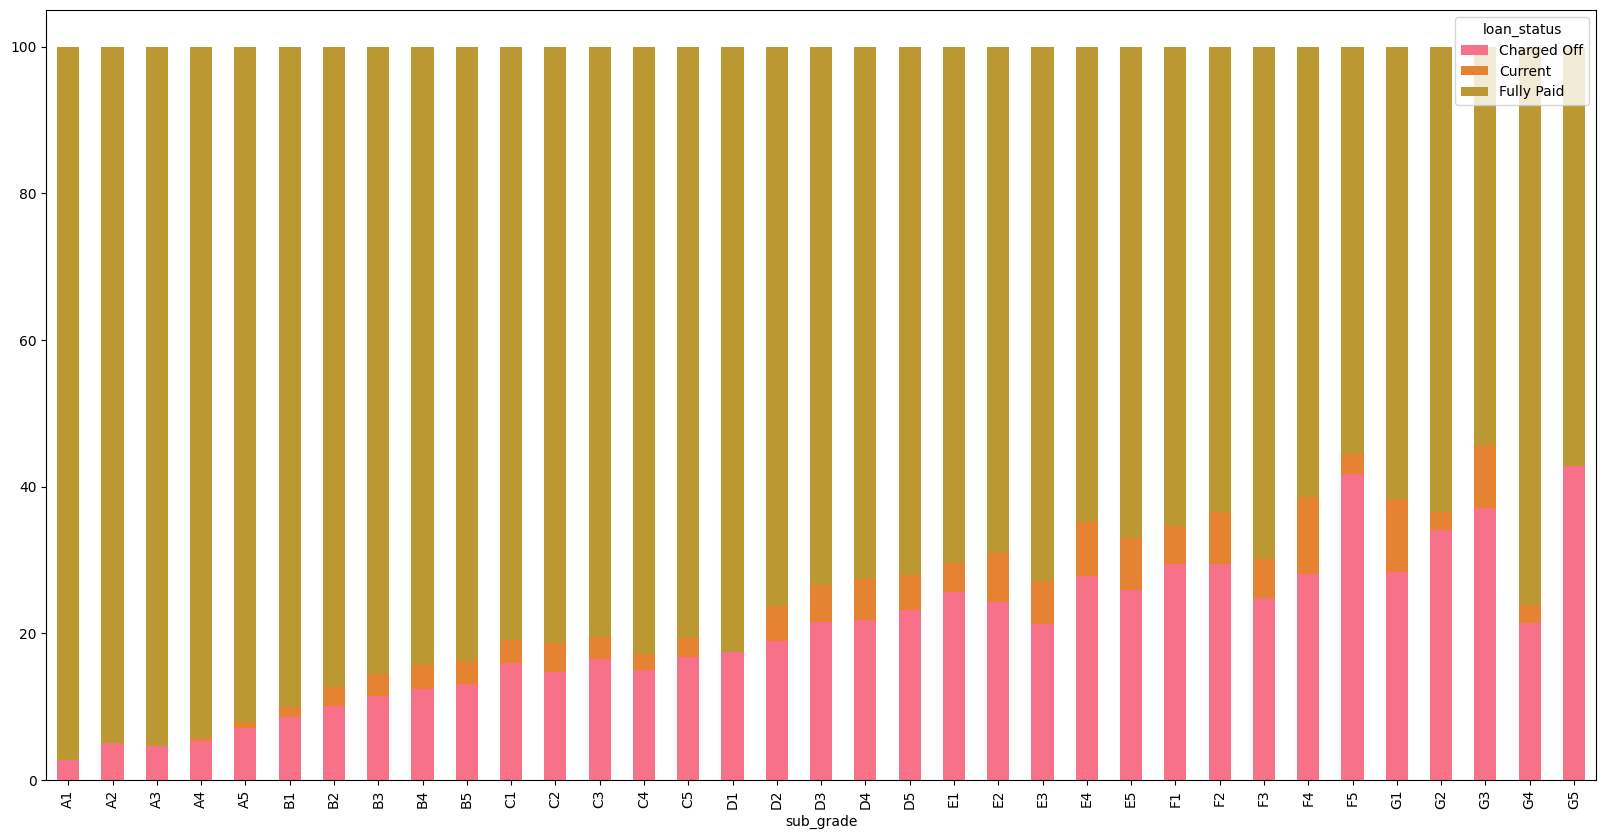

In [81]:
plt.figure(figsize=[16,6])
loan_data_temp.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(20, 10)
plt.show()

- The contribution of defaulters drastically increases from sub-grade C2 onwards, with F having 51% defaulter rate

Loan status vs Purpose

In [84]:
loan_data_temp = 100*loan_data.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack()
loan_data_temp.sort_values(by=['Charged Off'], ascending=False)

loan_status,Charged Off,Current,Fully Paid
purpose,,,
small_business,25.145068,4.255319,70.599613
renewable_energy,18.644068,1.694915,79.661017
educational,16.666667,NaN,83.333333
medical,16.372796,2.015113,81.612091
other,15.375103,3.215169,81.409728
house,14.901961,3.137255,81.960784
debt_consolidation,14.347863,2.977054,82.675083
vacation,14.062500,1.562500,84.375000
moving,12.903226,0.645161,86.451613


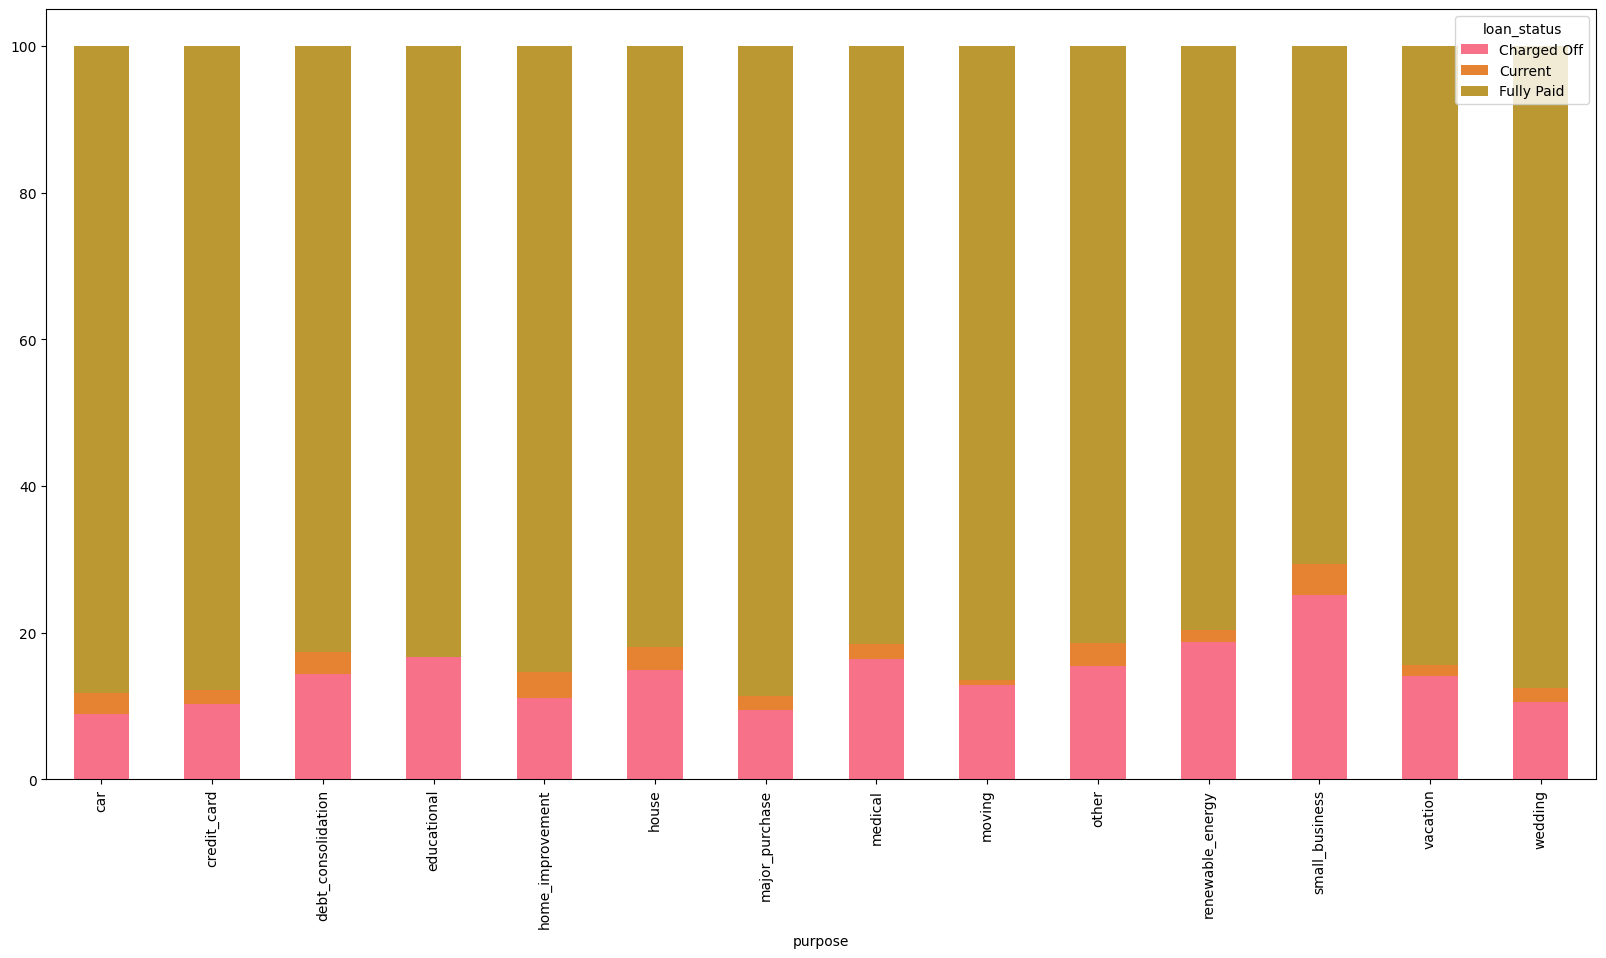

In [85]:
loan_data_temp.plot.bar(width=0.5, stacked=True)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [86]:
loan_data_temp = 100*loan_data.groupby('loan_status')['purpose'].value_counts(normalize=True).unstack()
loan_data_temp = loan_data_temp.T
loan_data_temp.sort_values(by=['Charged Off'], ascending=False)

loan_status,Charged Off,Current,Fully Paid
purpose,,,
debt_consolidation,50.540865,51.399116,47.516792
other,11.207933,11.487482,9.682796
credit_card,9.765625,8.983800,13.595137
small_business,7.812500,6.480118,3.578958
home_improvement,5.919471,9.425626,7.452076
major_purchase,3.816106,3.681885,5.814581
car,2.403846,3.681885,3.868216
medical,1.953125,1.178203,1.588469
wedding,1.862981,1.620029,2.534686


Loan status vs Term

In [87]:
loan_data_temp = 100*loan_data.groupby('term')['loan_status'].value_counts(normalize=True).unstack()
loan_data_temp

loan_status,Charged Off,Current,Fully Paid
term,,,
36,10.396817,NaN,89.603183
60,22.447425,10.347455,67.205120


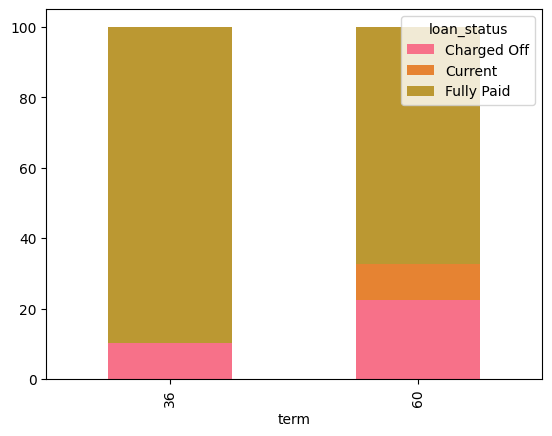

In [88]:
loan_data_temp.plot.bar(width=0.5, stacked=True)
plt.show()

In [90]:
loan_data_temp = 100*loan_data.groupby('loan_status')['term'].value_counts(normalize=True).unstack()
loan_data_temp.T

loan_status,Charged Off,Current,Fully Paid
term,,,
36,55.739183,NaN,78.379173
60,44.260817,100.0,21.620827


Loan status vs Employment length


In [91]:
loan_data_temp = 100*loan_data.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack()
loan_data_temp

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,13.215259,2.179837,84.604905
10+ years,15.443226,4.460138,80.096636
2 years,13.201769,1.871385,84.926846
3 years,12.877644,1.850453,85.271903
4 years,12.627197,2.821462,84.551341
5 years,13.890238,2.914036,83.195726
6 years,12.628488,2.936858,84.434655
7 years,14.791851,3.454384,81.753764
8 years,14.052288,2.832244,83.115468


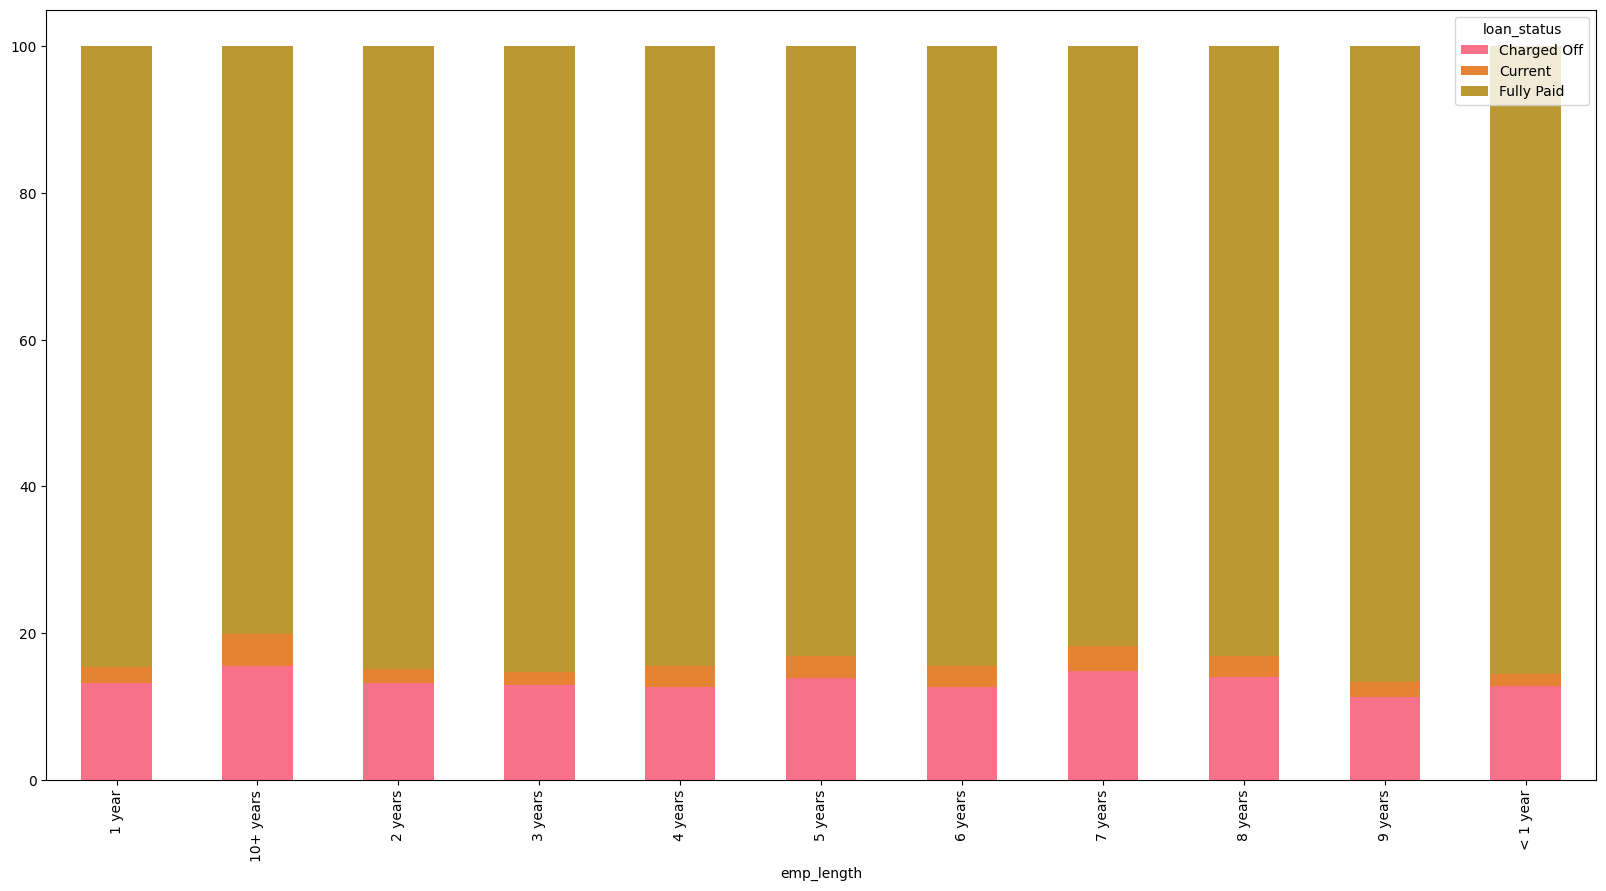

In [92]:
loan_data_temp.plot(kind='bar', width=0.5, stacked=True)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [93]:
loan_data_temp = 100*loan_data.groupby('loan_status')['emp_length'].value_counts(normalize=True).unstack()
loan_data_temp

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,8.743990,24.969952,11.658654,10.246394,8.203125,8.593750,5.168269,5.018029,3.876202,2.734375,10.787260
Current,7.069219,35.346097,8.100147,7.216495,8.983800,8.836524,5.891016,5.743741,3.829161,2.356406,6.627393
Fully Paid,9.133696,21.130558,12.237094,11.070255,8.962102,8.398294,5.638084,4.525175,3.740746,3.431877,11.732117


- While the spread of completed and defaulters are pretty much even across all employment length, 16% defaulters in 10+ years being the highest and contributing 24% to the overall defaulter contribution.

Loan status vs home ownership


In [95]:

loan_data = loan_data[loan_data['home_ownership'] != 'NONE']
loan_data= 100*loan_data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).unstack()
loan_data_temp

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,8.743990,24.969952,11.658654,10.246394,8.203125,8.593750,5.168269,5.018029,3.876202,2.734375,10.787260
Current,7.069219,35.346097,8.100147,7.216495,8.983800,8.836524,5.891016,5.743741,3.829161,2.356406,6.627393
Fully Paid,9.133696,21.130558,12.237094,11.070255,8.962102,8.398294,5.638084,4.525175,3.740746,3.431877,11.732117


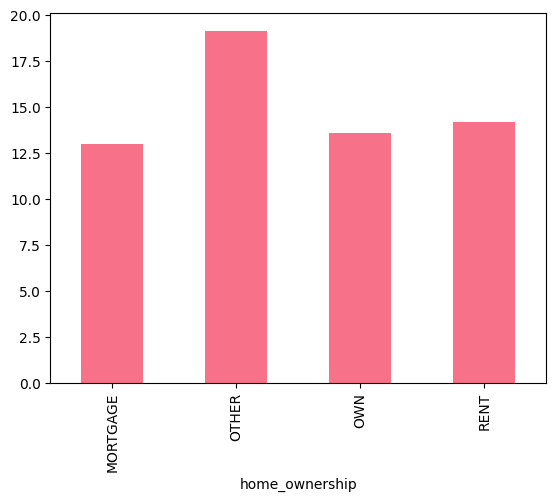

In [102]:
loan_data['Charged Off'].plot(kind='bar', width=0.5, stacked=True)
plt.show()

- While the distribution of home owners remain almost the same across charged-off and Fully paid, we see higher number of customers who mention OTHER to be defaulters.

Loan status vs annual income

In [117]:
ld=pd.read_csv("loan.csv")

In [118]:
ld.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

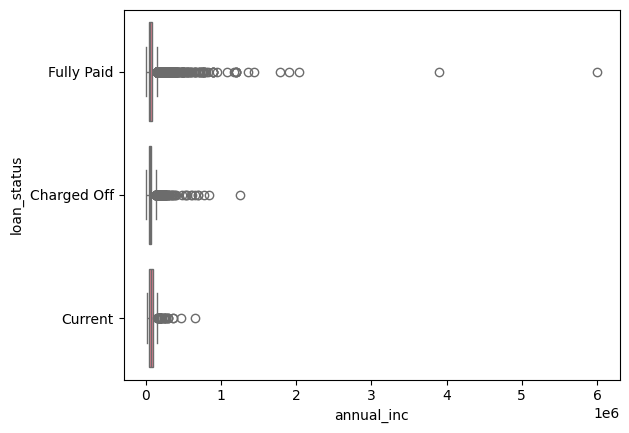

In [154]:
sns.boxplot(data=ld, x='annual_inc', y='loan_status')
plt.show()

Loan status vs interest rates


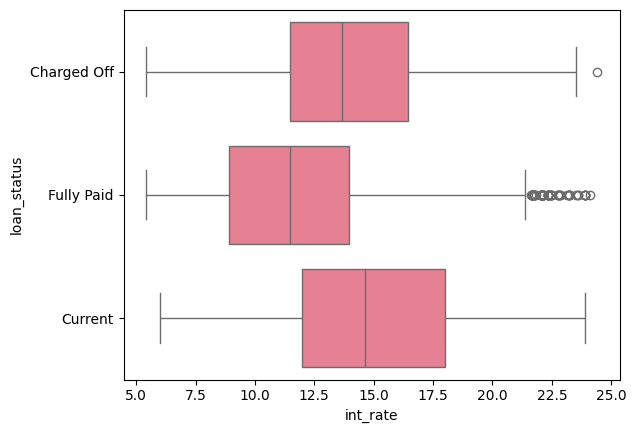

In [153]:
sns.boxplot(data=loan_data, x='int_rate', y='loan_status')
plt.show()

- Defaulters are mostly the ones with higher interest rates as the median of the fully paid is Q1 of charged-off.

Loan status vs funded amount


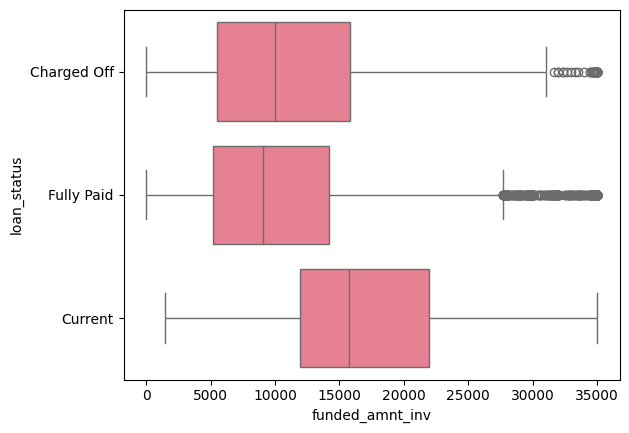

In [155]:
sns.boxplot(data=loan_data, x='funded_amnt_inv', y='loan_status')
plt.show()

- The gap between the upper whiskers of fully paid and charged off is huge along with the size of the box plot. It looks like people who take a higher loan are more likely to default.

        MULTIVARIATE ANALYSIS

In [27]:
print(loan_data.dtypes)


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [28]:
# Selecting numeric columns only
numeric_loan_data = loan_data.select_dtypes(include=['number'])


In [29]:
loan_correlation = numeric_loan_data.corr()
print(loan_correlation)


                                  id  member_id  loan_amnt  funded_amnt  \
id                          1.000000   0.992652   0.185018     0.195112   
member_id                   0.992652   1.000000   0.186839     0.196282   
loan_amnt                   0.185018   0.186839   1.000000     0.978518   
funded_amnt                 0.195112   0.196282   0.978518     1.000000   
funded_amnt_inv             0.274752   0.286134   0.941039     0.963216   
installment                 0.107991   0.105578   0.923123     0.952919   
annual_inc                  0.023207   0.024262   0.291171     0.284355   
dti                         0.095201   0.096885   0.074483     0.075066   
delinq_2yrs                -0.005760  -0.005909  -0.029875    -0.030673   
inq_last_6mths             -0.049798  -0.054716   0.002819     0.003127   
open_acc                    0.028410   0.025860   0.171012     0.169338   
pub_rec                    -0.022991  -0.023470  -0.052226    -0.052541   
revol_bal                

In [160]:
# One-hot encode categorical columns if necessary
loan_data_encoded = pd.get_dummies(loan_data, drop_first=True)


In [31]:
clm=loan_data.columns
for i in clm:
    try:
        print('correlation between ',i,'and target is ',loan_data[i].corr(loan_data['target']))
    except:
        pass

correlation between  id and target is  0.03673253963497522
correlation between  member_id and target is  0.034441413907688234
correlation between  loan_amnt and target is  0.06254209429681327
correlation between  funded_amnt and target is  0.059312663743951284
correlation between  funded_amnt_inv and target is  0.04038090534639854
correlation between  installment and target is  0.03284827436373681
correlation between  annual_inc and target is  -0.040088729493519576
correlation between  dti and target is  0.04315782986192553
correlation between  delinq_2yrs and target is  0.004594664370488922
correlation between  inq_last_6mths and target is  0.06867779531658734
correlation between  open_acc and target is  0.005727818399545247
correlation between  pub_rec and target is  0.047954897379819485
correlation between  revol_bal and target is  0.012073946164679664
correlation between  total_acc and target is  -0.01146395385273827
correlation between  out_prncp and target is  -0.0536006519026564

In [33]:
data=loan_data.drop(['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',"tax_liens"],axis=1)

In [34]:
data.corr(numeric_only=True)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,target
id,1.000000,0.992652,0.185018,0.195112,0.274752,0.107991,0.023207,0.095201,-0.005760,-0.049798,...,0.175471,0.242072,0.143106,0.208084,-0.057224,0.042641,-0.010861,0.153136,-0.008787,0.036733
member_id,0.992652,1.000000,0.186839,0.196282,0.286134,0.105578,0.024262,0.096885,-0.005909,-0.054716,...,0.178347,0.253477,0.146180,0.210173,-0.059041,0.040963,-0.012047,0.154916,-0.009110,0.034441
loan_amnt,0.185018,0.186839,1.000000,0.978518,0.941039,0.923123,0.291171,0.074483,-0.029875,0.002819,...,0.879894,0.850954,0.843675,0.726138,0.044833,0.136308,0.073955,0.439791,-0.030746,0.062542
funded_amnt,0.195112,0.196282,0.978518,1.000000,0.963216,0.952919,0.284355,0.075066,-0.030673,0.003127,...,0.899322,0.870896,0.864543,0.736743,0.046768,0.137191,0.075684,0.443223,-0.032316,0.059313
funded_amnt_inv,0.274752,0.286134,0.941039,0.963216,1.000000,0.906248,0.270073,0.079805,-0.036480,-0.009877,...,0.880877,0.909679,0.844287,0.730981,0.030124,0.124553,0.061440,0.431701,-0.040614,0.040381
installment,0.107991,0.105578,0.923123,0.952919,0.906248,1.000000,0.287215,0.061464,-0.018856,0.004882,...,0.851159,0.815166,0.844768,0.629444,0.059231,0.118290,0.078232,0.387881,-0.028496,0.032848
annual_inc,0.023207,0.024262,0.291171,0.284355,0.270073,0.287215,1.000000,-0.135042,0.028208,0.039906,...,0.273258,0.261083,0.273223,0.198678,0.006491,0.030508,0.025525,0.141340,-0.012780,-0.040089
dti,0.095201,0.096885,0.074483,0.075066,0.079805,0.061464,-0.135042,1.000000,-0.039949,-0.001019,...,0.069637,0.074032,0.046026,0.110137,-0.014730,0.021379,0.005018,0.008470,-0.001116,0.043158
delinq_2yrs,-0.005760,-0.005909,-0.029875,-0.030673,-0.036480,-0.018856,0.028208,-0.039949,1.000000,0.008102,...,-0.014254,-0.020886,-0.030976,0.031915,0.038491,0.007074,0.013053,-0.007246,0.003569,0.004595
inq_last_6mths,-0.049798,-0.054716,0.002819,0.003127,-0.009877,0.004882,0.039906,-0.001019,0.008102,1.000000,...,-0.015667,-0.024934,-0.028899,0.018558,0.037150,0.018479,0.013209,0.025545,0.011708,0.068678


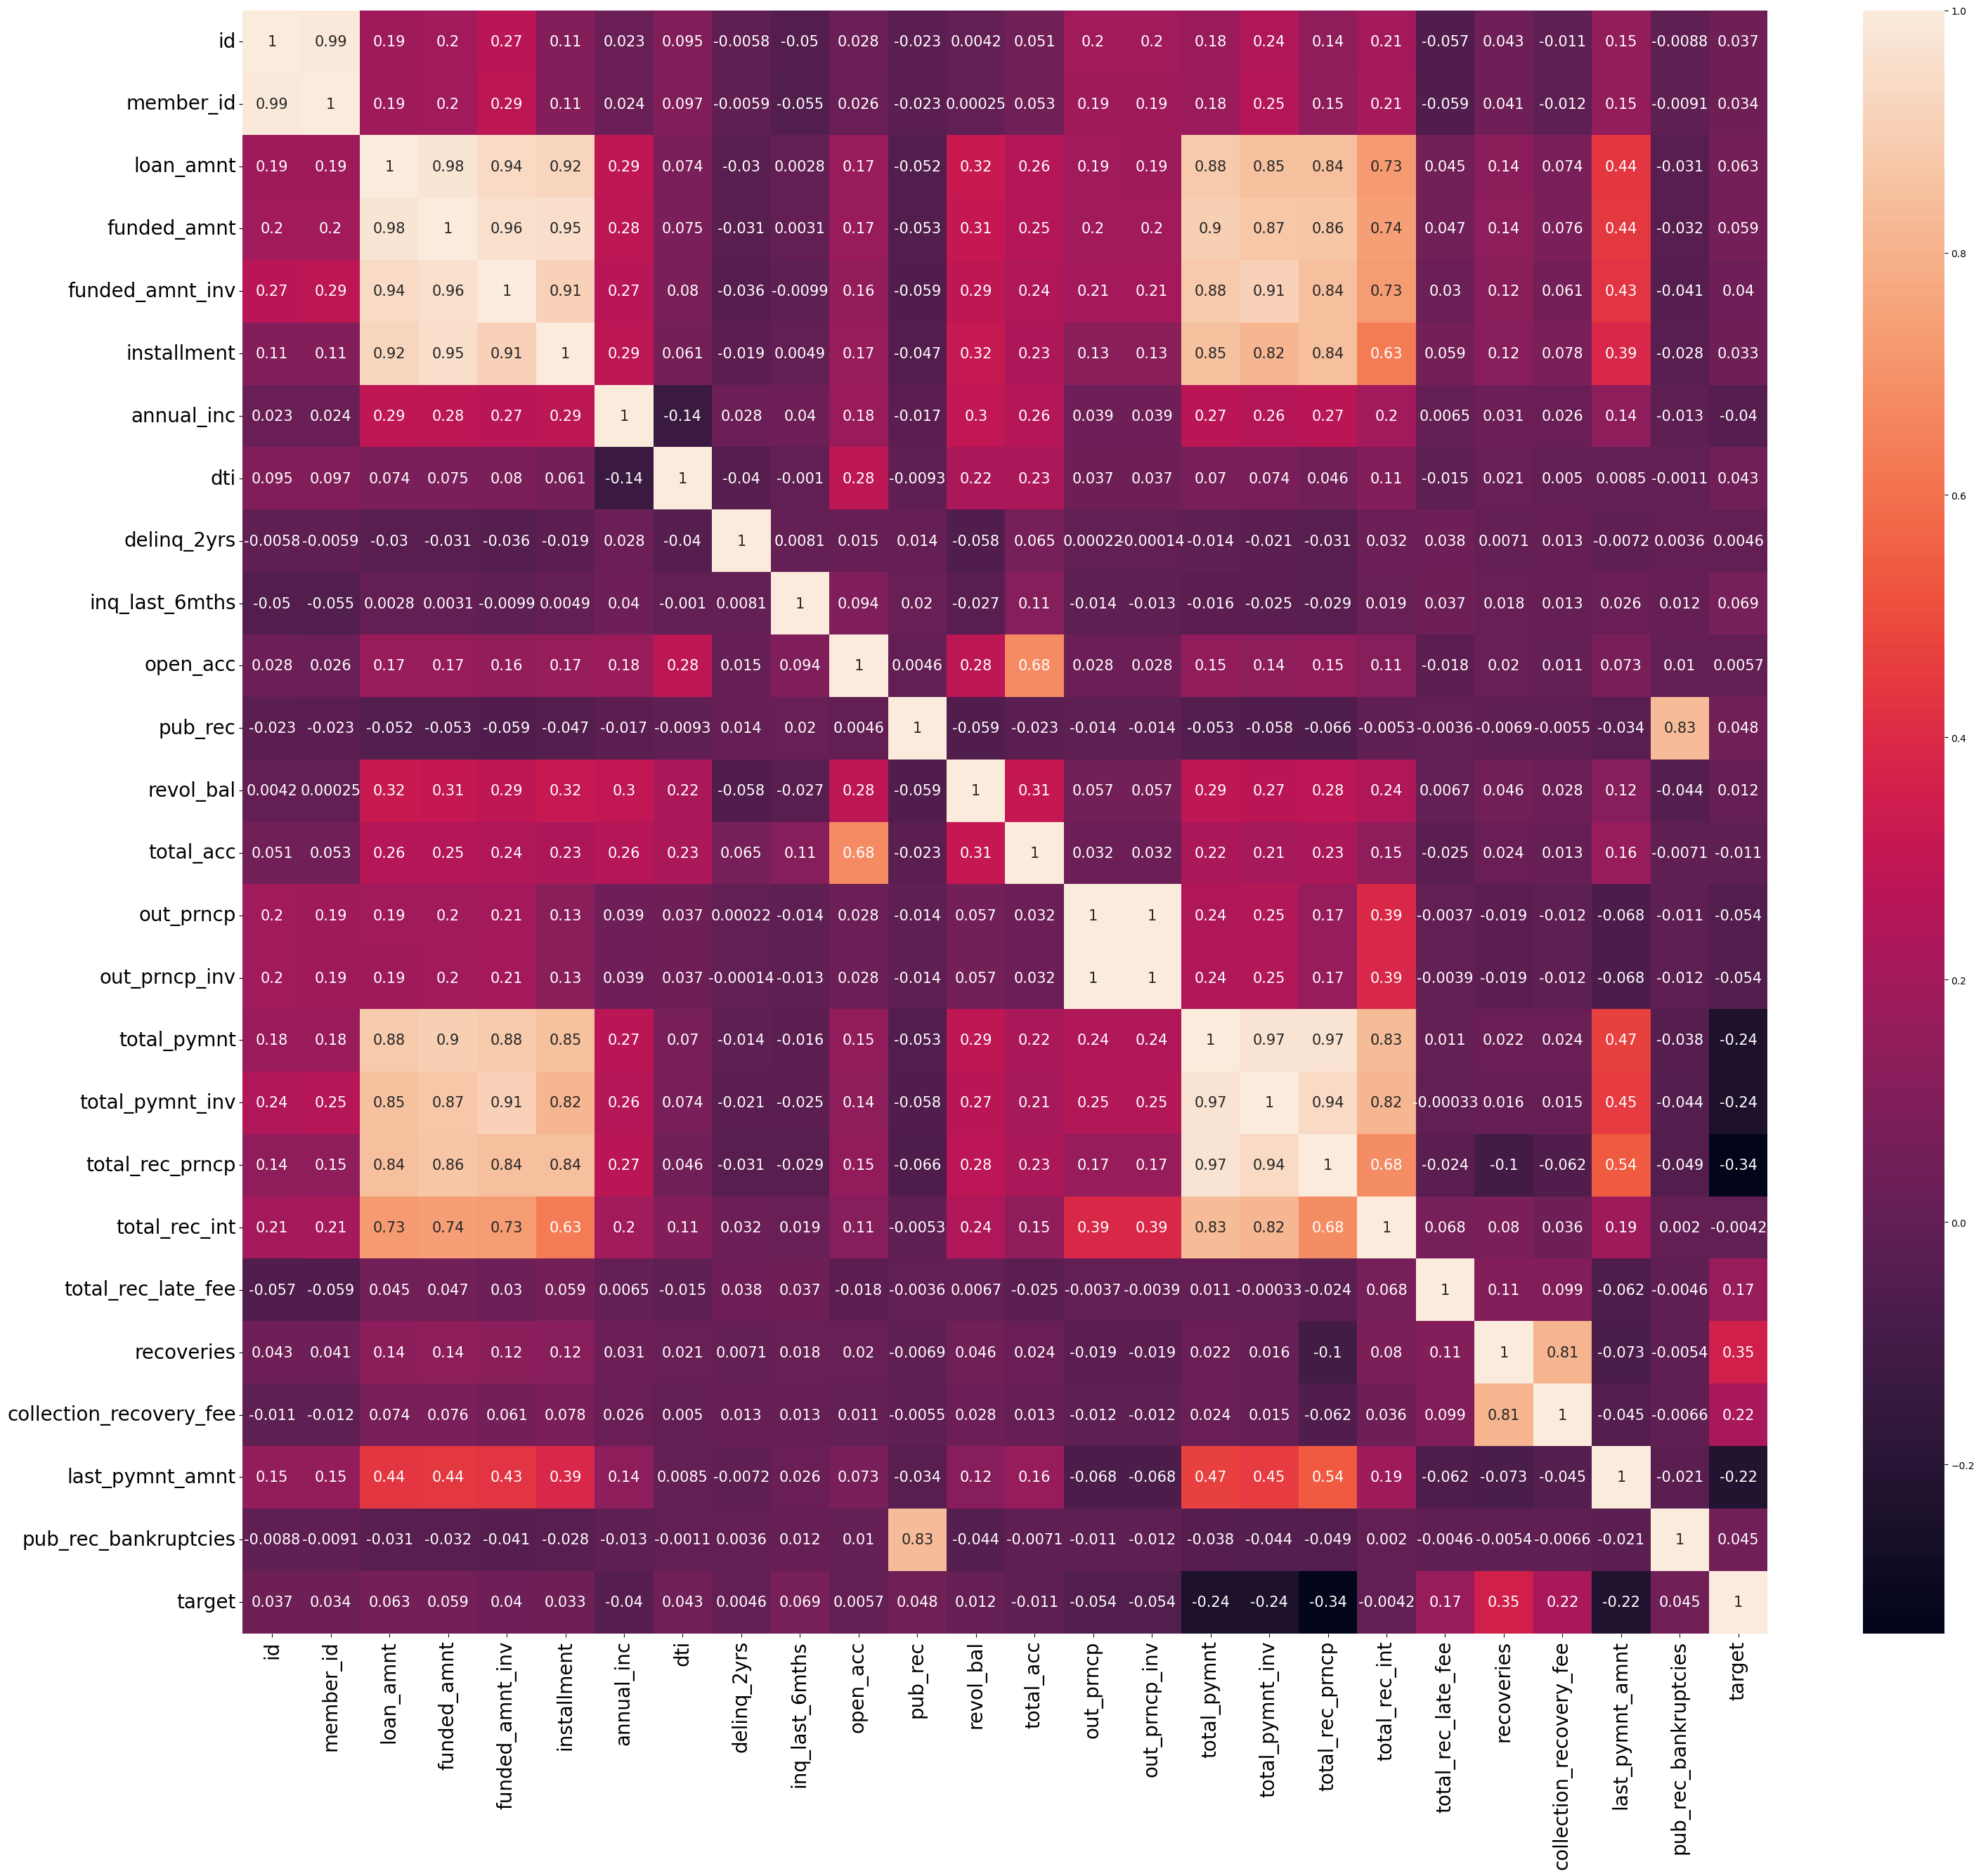

In [35]:
plt.figure(figsize=(35,30))
sns.heatmap(data.corr(numeric_only=True), annot=True,annot_kws={'size': 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Insights

- From the above heatmap we can obsereve that the columns term, int_rate, revol_util has positive correlation with the target column and total_payment, total_payment_inv, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee and last_payment_amount  has negative correlation with the target column.

- And we also observe that columns  loan_amnt, funded_amnt, funded_amnt_inv, total_payment, total_payment_inv, total_rec_prncp, total_rec_int has high correlation among them self.

    Observations :

- The columns loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installement, dti, revol_bal, revol_util, total_rec_late_fee, recoveries,& collection_recovery_fee has high defaulted values.

- We can also observe that in grades geade C, B,  D has more defalted vales than other, and in emp_length 10+ years has more defalted vales than other, and in home owership Rent & Mortgage has more defalted vales than other, and in purpose column debt_consolidation has more defalted vales than other and in add_state CA has more defalted vales than other.

- Lending club shuold consider to accepting more loans request less then 10% interest rate as their probabity of charged_off is have lesser.

- Lending club need to accept loan which owning house, annual income have greater then 90000, interest rate is less then 10%.This combination is have less chances to charged_off.

- Lending club shuold consider to accepting more loans request for grade A respect to B C D becuase in B C D E have lots off Charged_off


